# Statistiche Primarie

Carichiamo una serie di dati daily e calcoliamo alcune metriche derivate dai prezzi:

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "HD_Daily.txt"

startDate = "20000101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Vol'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['CloseOpen'] = round((instrument['Close'] - instrument['Open']),2)
instrument['CloseOpenPerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Color'] = list(map(lambda x: "Black" if x<0 else "White", instrument['CloseOpen']))
instrument['OpenLow'] = round((instrument['Open'] - instrument['Low']),2)
instrument['HighOpen'] = round((instrument['High'] - instrument['Open']),2)
instrument['CloseLow'] = round((instrument['Close'] - instrument['Low']),2)
instrument['HighClose'] = round((instrument['High'] - instrument['Close']),2)
instrument['BodyRangePerc'] = round(instrument['Body']/instrument['Range'] * 100,2)
# Percentuale della barra (all'interno del range) dove si attesta il close
instrument['CloseBarPerc'] = round((instrument['Close'] - instrument['Low']) * 100 / instrument['Range'],2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

Il file contiene 4682 record


,Open,High,Low,Close,Vol,AvgPrice,Range,Body,CloseOpen,CloseOpenPerc,Color,OpenLow,HighOpen,CloseLow,HighClose,BodyRangePerc,CloseBarPerc,DeltaClosePerc
Date_Time,,,,,,,,,,,,,,,,,,
2000-01-03 16:00:00,68.63,69.19,63.81,65.19,12030600,66.70,5.38,3.44,-3.44,-5.01,Black,4.82,0.56,1.38,4.00,63.94,25.65,NaN
2000-01-04 16:00:00,64.00,64.31,61.19,61.69,8722000,62.80,3.12,2.31,-2.31,-3.61,Black,2.81,0.31,0.50,2.62,74.04,16.03,-5.37
2000-01-05 16:00:00,61.75,63.00,61.00,62.00,6939800,61.94,2.00,0.25,0.25,0.40,White,0.75,1.25,1.00,1.00,12.50,50.00,0.50
2000-01-06 16:00:00,61.63,62.00,60.00,60.00,6607600,60.91,2.00,1.63,-1.63,-2.64,Black,1.63,0.37,0.00,2.00,81.50,0.00,-3.23
2000-01-07 16:00:00,61.75,63.50,60.75,63.50,6207300,62.38,2.75,1.75,1.75,2.83,White,1.00,1.75,2.75,0.00,63.64,100.00,5.83
2000-01-10 16:00:00,62.00,63.56,62.00,63.19,5455400,62.69,1.56,1.19,1.19,1.92,White,0.00,1.56,1.19,0.37,76.28,76.28,-0.49
2000-01-11 16:00:00,63.44,63.63,61.25,61.56,4371600,62.47,2.38,1.88,-1.88,-2.96,Black,2.19,0.19,0.31,2.07,78.99,13.03,-2.58
2000-01-12 16:00:00,61.56,62.06,60.69,61.06,4629400,61.34,1.37,0.50,-0.50,-0.81,Black,0.87,0.50,0.37,1.00,36.50,27.01,-0.81
2000-01-13 16:00:00,62.13,62.50,61.50,62.13,4538900,62.06,1.00,0.00,0.00,0.00,White,0.63,0.37,0.63,0.37,0.00,63.00,1.75


Visualizziamo rapidamente le statistiche dei prezzi:

In [2]:
instrument.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4681.0,6.262071e+01,4.408440e+01,17.74,33.88,41.43,78.81,207.23
High,4681.0,6.322779e+01,4.432258e+01,18.60,34.34,41.96,79.40,207.61
Low,4681.0,6.200205e+01,4.383873e+01,17.05,33.48,41.00,78.31,204.71
Close,4681.0,6.262888e+01,4.409429e+01,18.00,33.87,41.50,78.72,207.23
Vol,4681.0,1.010005e+07,6.988861e+06,100.00,5412659.00,7965800.00,12611204.00,94536971.00
AvgPrice,4681.0,6.261978e+01,4.408262e+01,18.10,33.88,41.48,78.89,206.14
Range,4681.0,1.225736e+00,9.742639e-01,0.17,0.65,0.96,1.51,23.71
Body,4681.0,5.993890e-01,6.826895e-01,0.00,0.18,0.40,0.77,12.42
CloseOpen,4681.0,8.169195e-03,9.084835e-01,-9.92,-0.39,0.00,0.41,12.42
CloseOpenPerc,4681.0,2.555437e-02,1.653605e+00,-6.98,-0.77,0.00,0.78,12.98


Aggiungiamo ulteriori valori percentili di confronto:

In [3]:
instrument.describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Open,4681.0,6.262071e+01,4.408440e+01,17.74,27.05,31.85,35.52,38.12,41.43,49.36,65.50,98.15,134.73,207.23
High,4681.0,6.322779e+01,4.432258e+01,18.60,27.50,32.25,35.96,38.45,41.96,49.88,66.70,98.87,135.46,207.61
Low,4681.0,6.200205e+01,4.383873e+01,17.05,26.65,31.52,35.17,37.68,41.00,48.60,64.29,97.09,133.77,204.71
Close,4681.0,6.262888e+01,4.409429e+01,18.00,27.09,31.81,35.54,38.06,41.50,49.26,65.47,98.14,134.58,207.23
Vol,4681.0,1.010005e+07,6.988861e+06,100.00,4060994.00,5011045.00,5881432.00,6889100.00,7965800.00,9481258.00,11486234.00,14083557.00,18693100.00,94536971.00
AvgPrice,4681.0,6.261978e+01,4.408262e+01,18.10,27.07,31.86,35.55,38.06,41.48,49.31,65.59,98.24,134.66,206.14
Range,4681.0,1.225736e+00,9.742639e-01,0.17,0.48,0.59,0.70,0.82,0.96,1.13,1.37,1.68,2.25,23.71
Body,4681.0,5.993890e-01,6.826895e-01,0.00,0.07,0.14,0.22,0.30,0.40,0.52,0.68,0.92,1.33,12.42
CloseOpen,4681.0,8.169195e-03,9.084835e-01,-9.92,-0.89,-0.51,-0.29,-0.13,0.00,0.14,0.31,0.54,0.93,12.42
CloseOpenPerc,4681.0,2.555437e-02,1.653605e+00,-6.98,-1.76,-1.01,-0.58,-0.27,0.00,0.29,0.60,1.01,1.72,12.98


Visualizziamo la distribuzione delle chiusure:

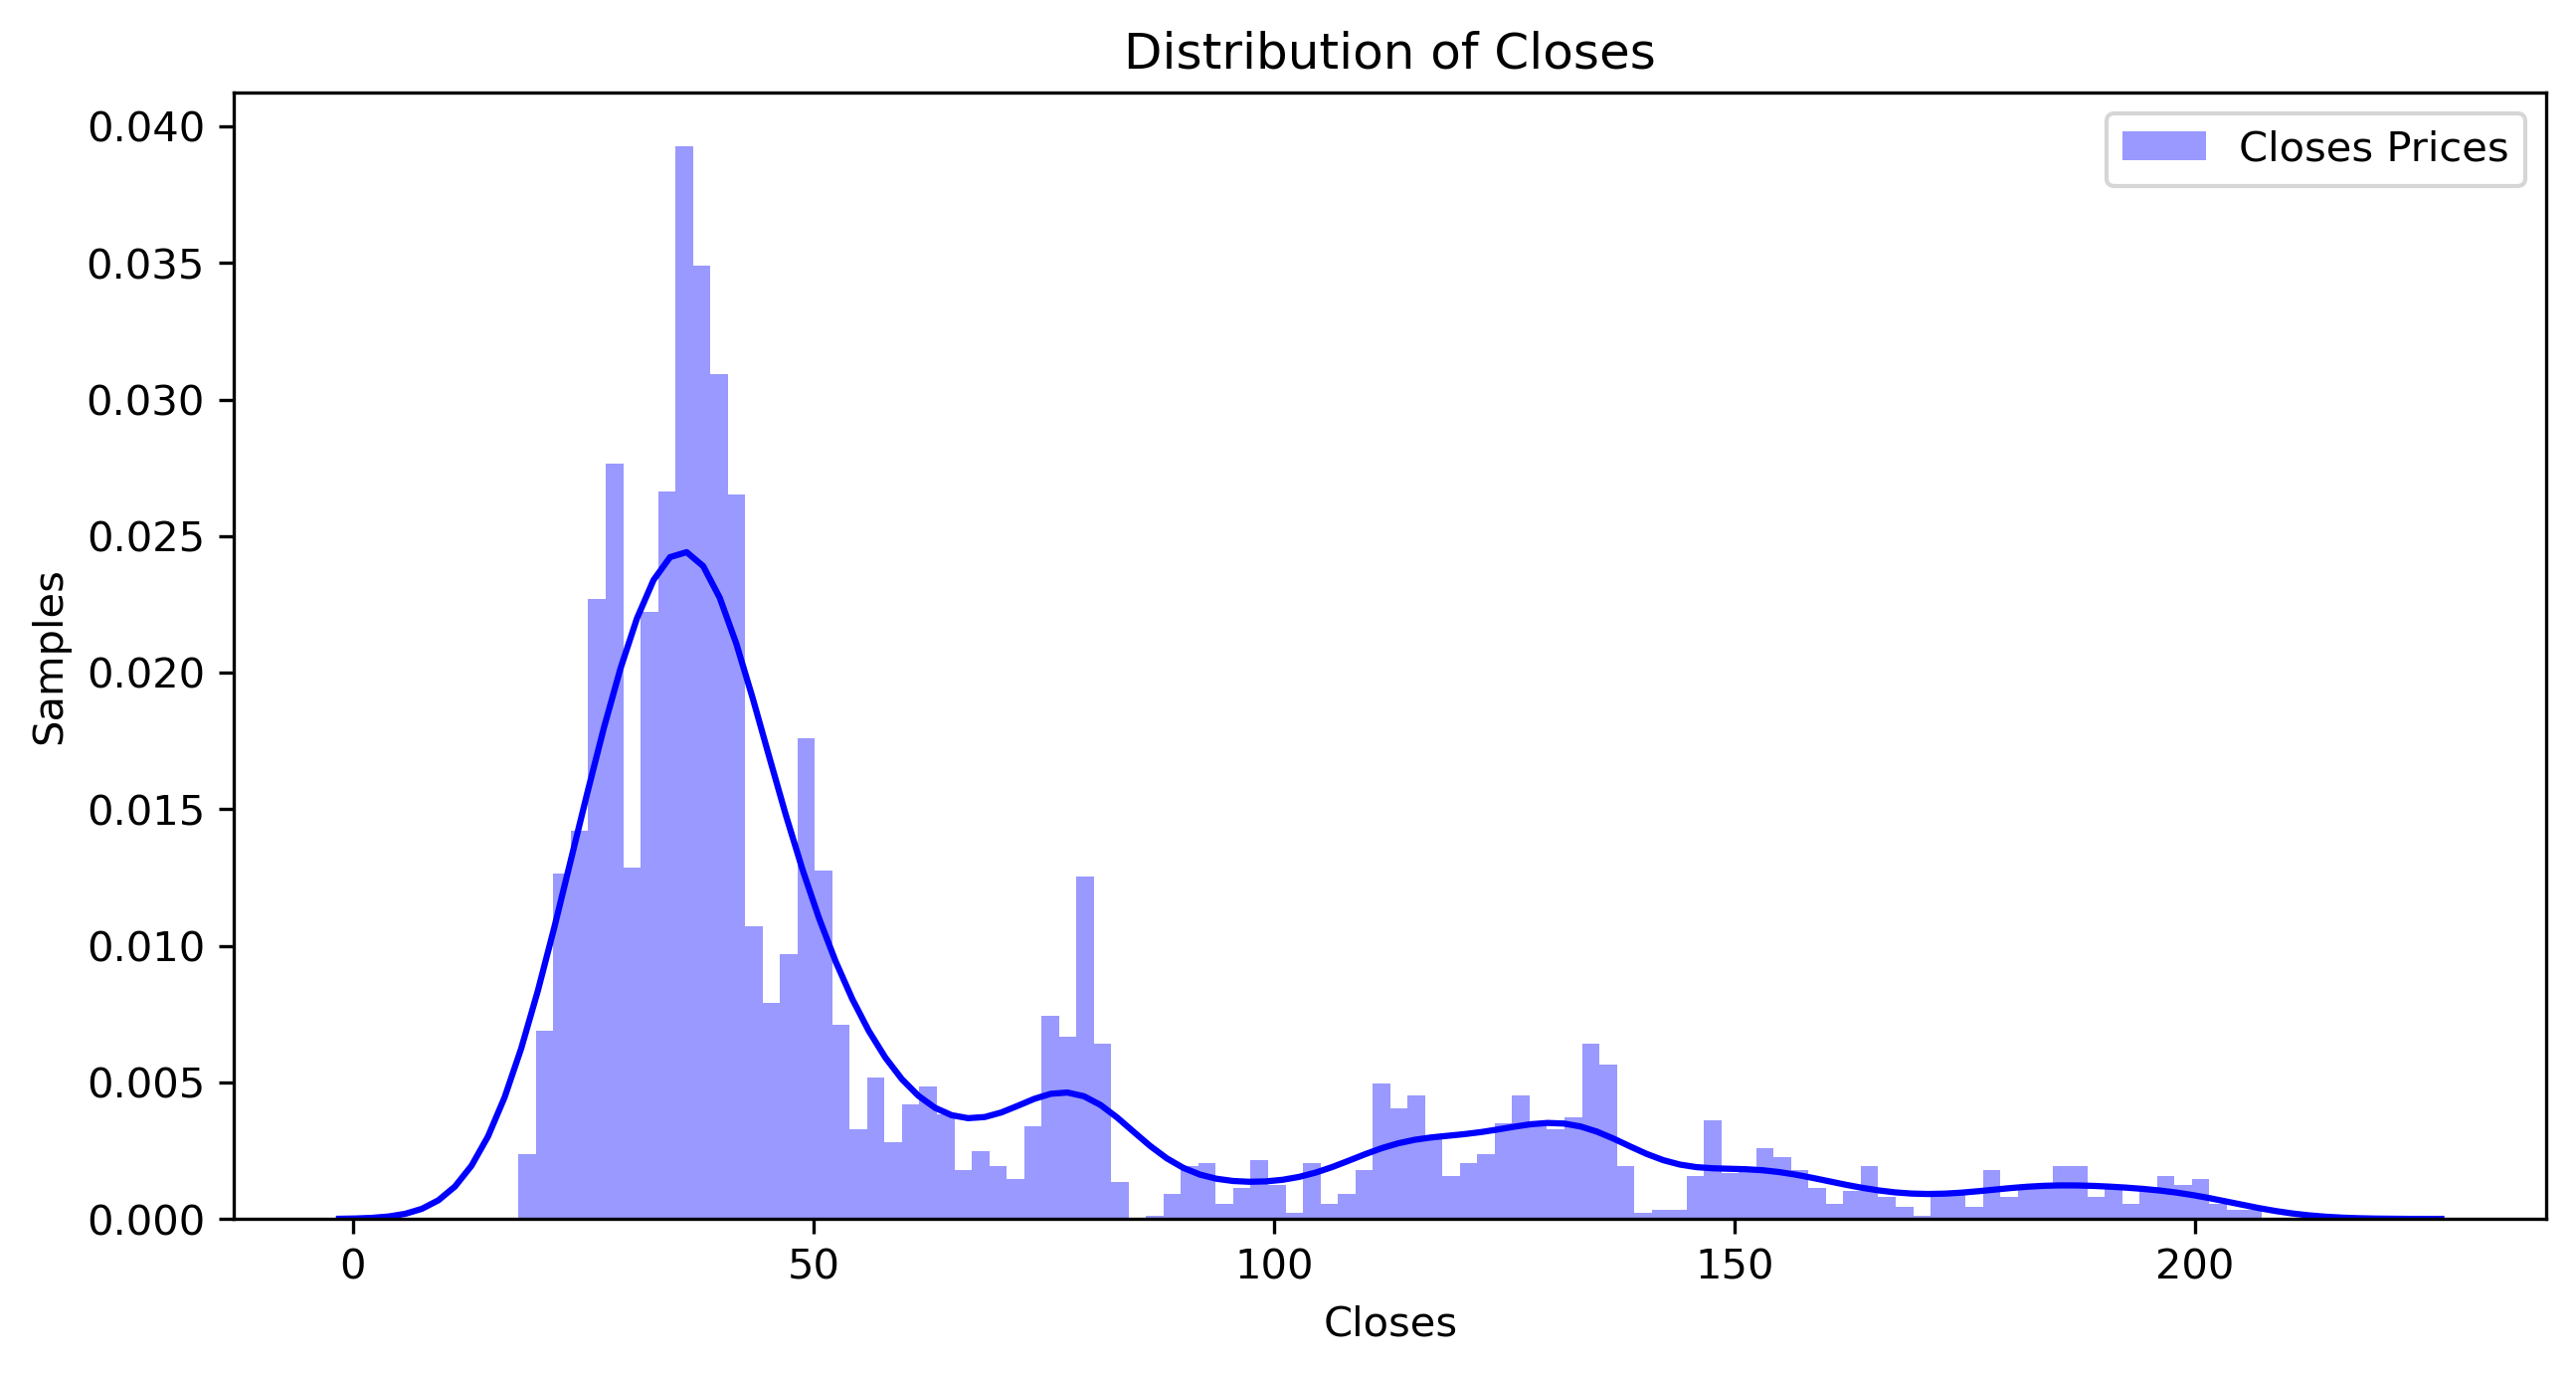

In [4]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument.Close, bins=100, color='b', label='Closes Prices')
plt.title("Distribution of Closes")
plt.xlabel("Closes")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione delle aperture:

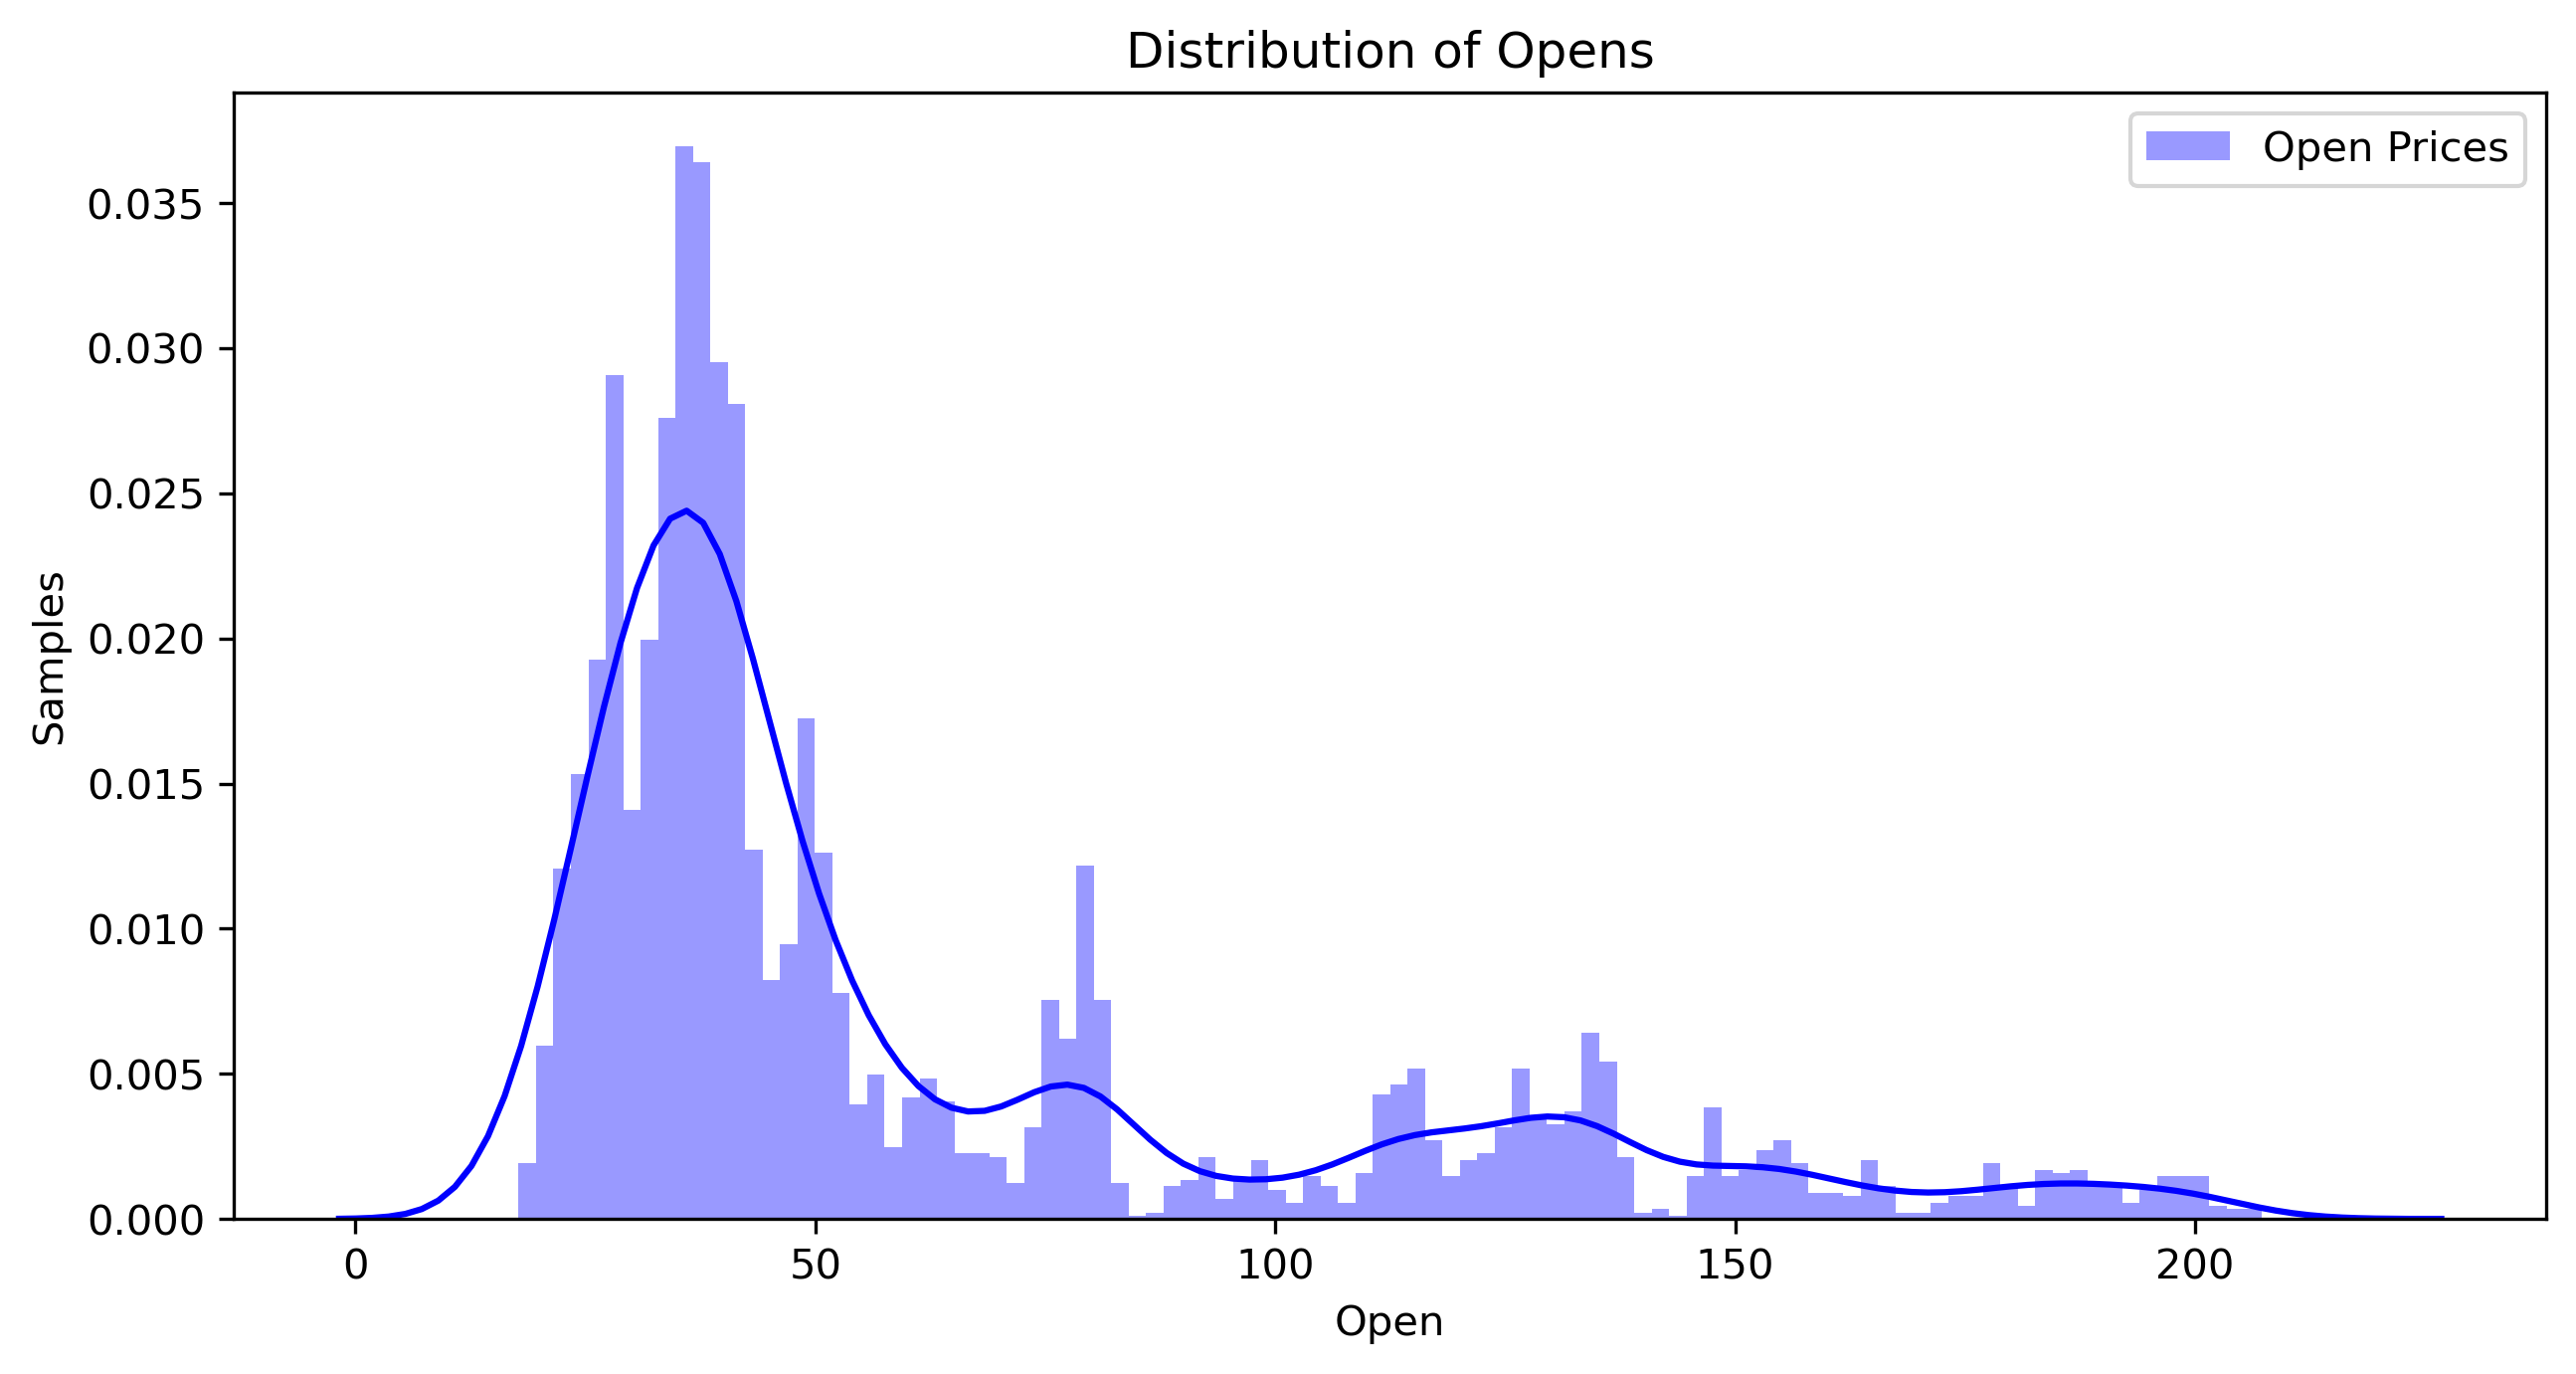

In [5]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['Open'], bins=100, color='b', label='Open Prices')
plt.title("Distribution of Opens")
plt.xlabel("Open")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione dei massimi:

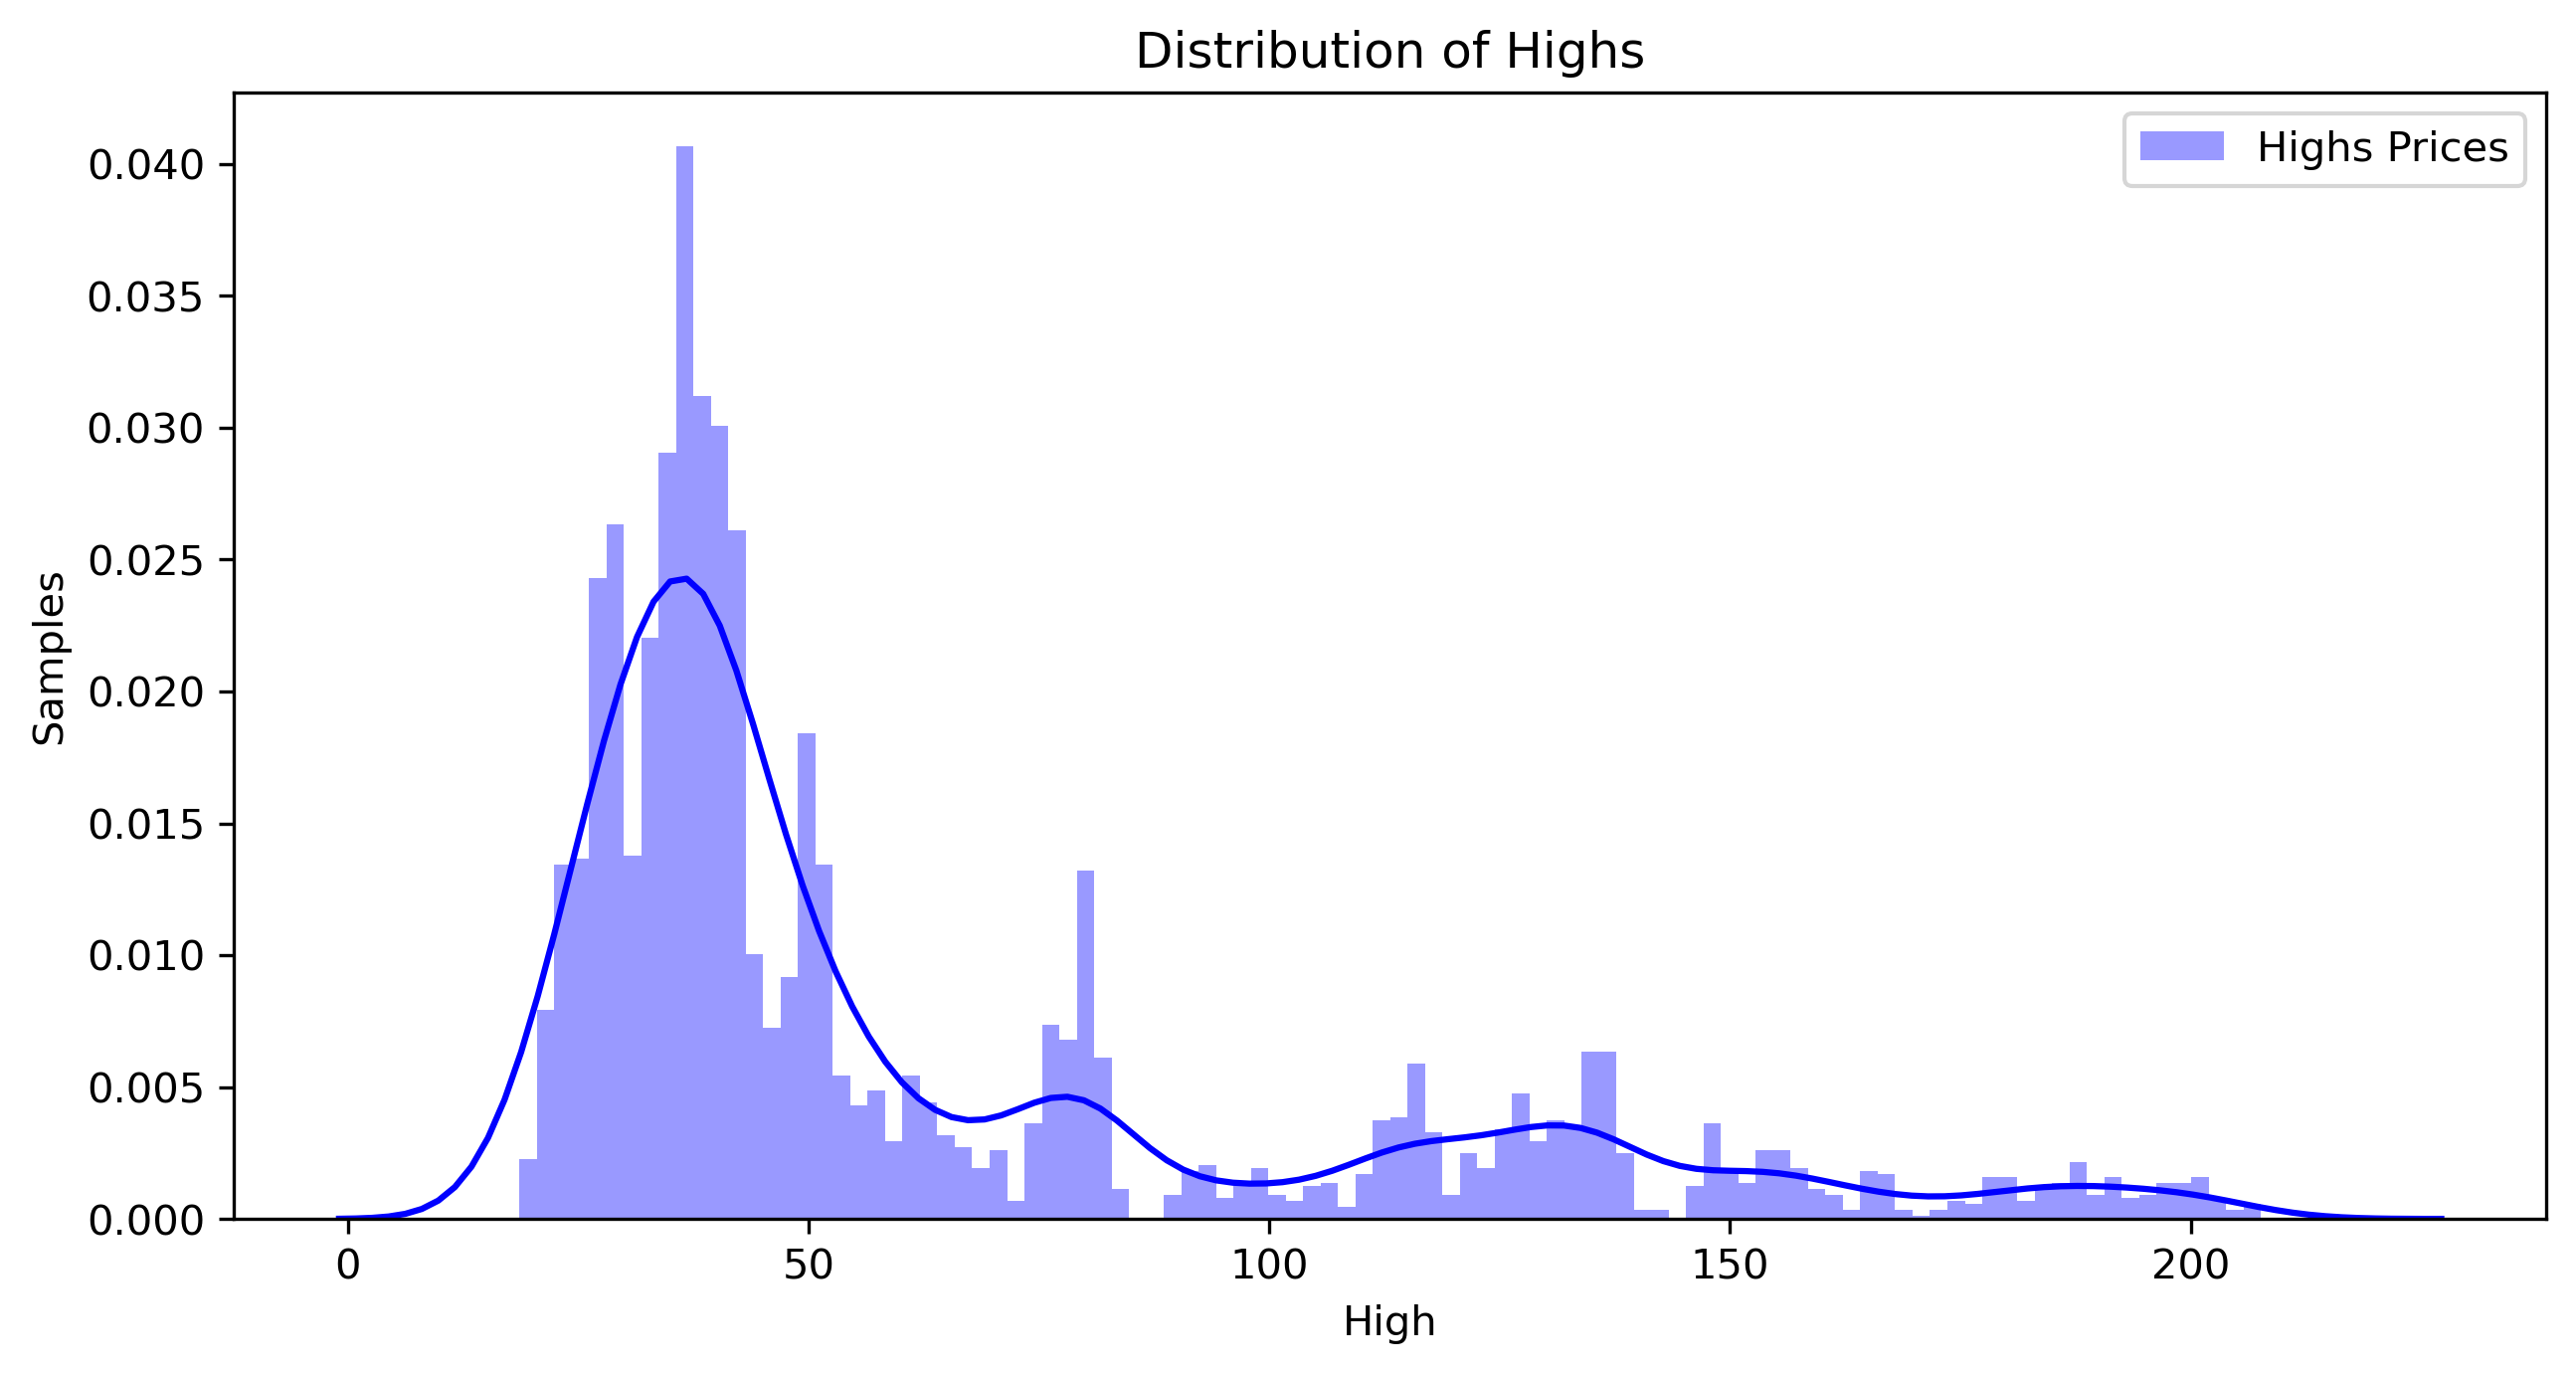

In [6]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['High'], bins=100, color='b', label='Highs Prices')
plt.title("Distribution of Highs")
plt.xlabel("High")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione dei minimi:

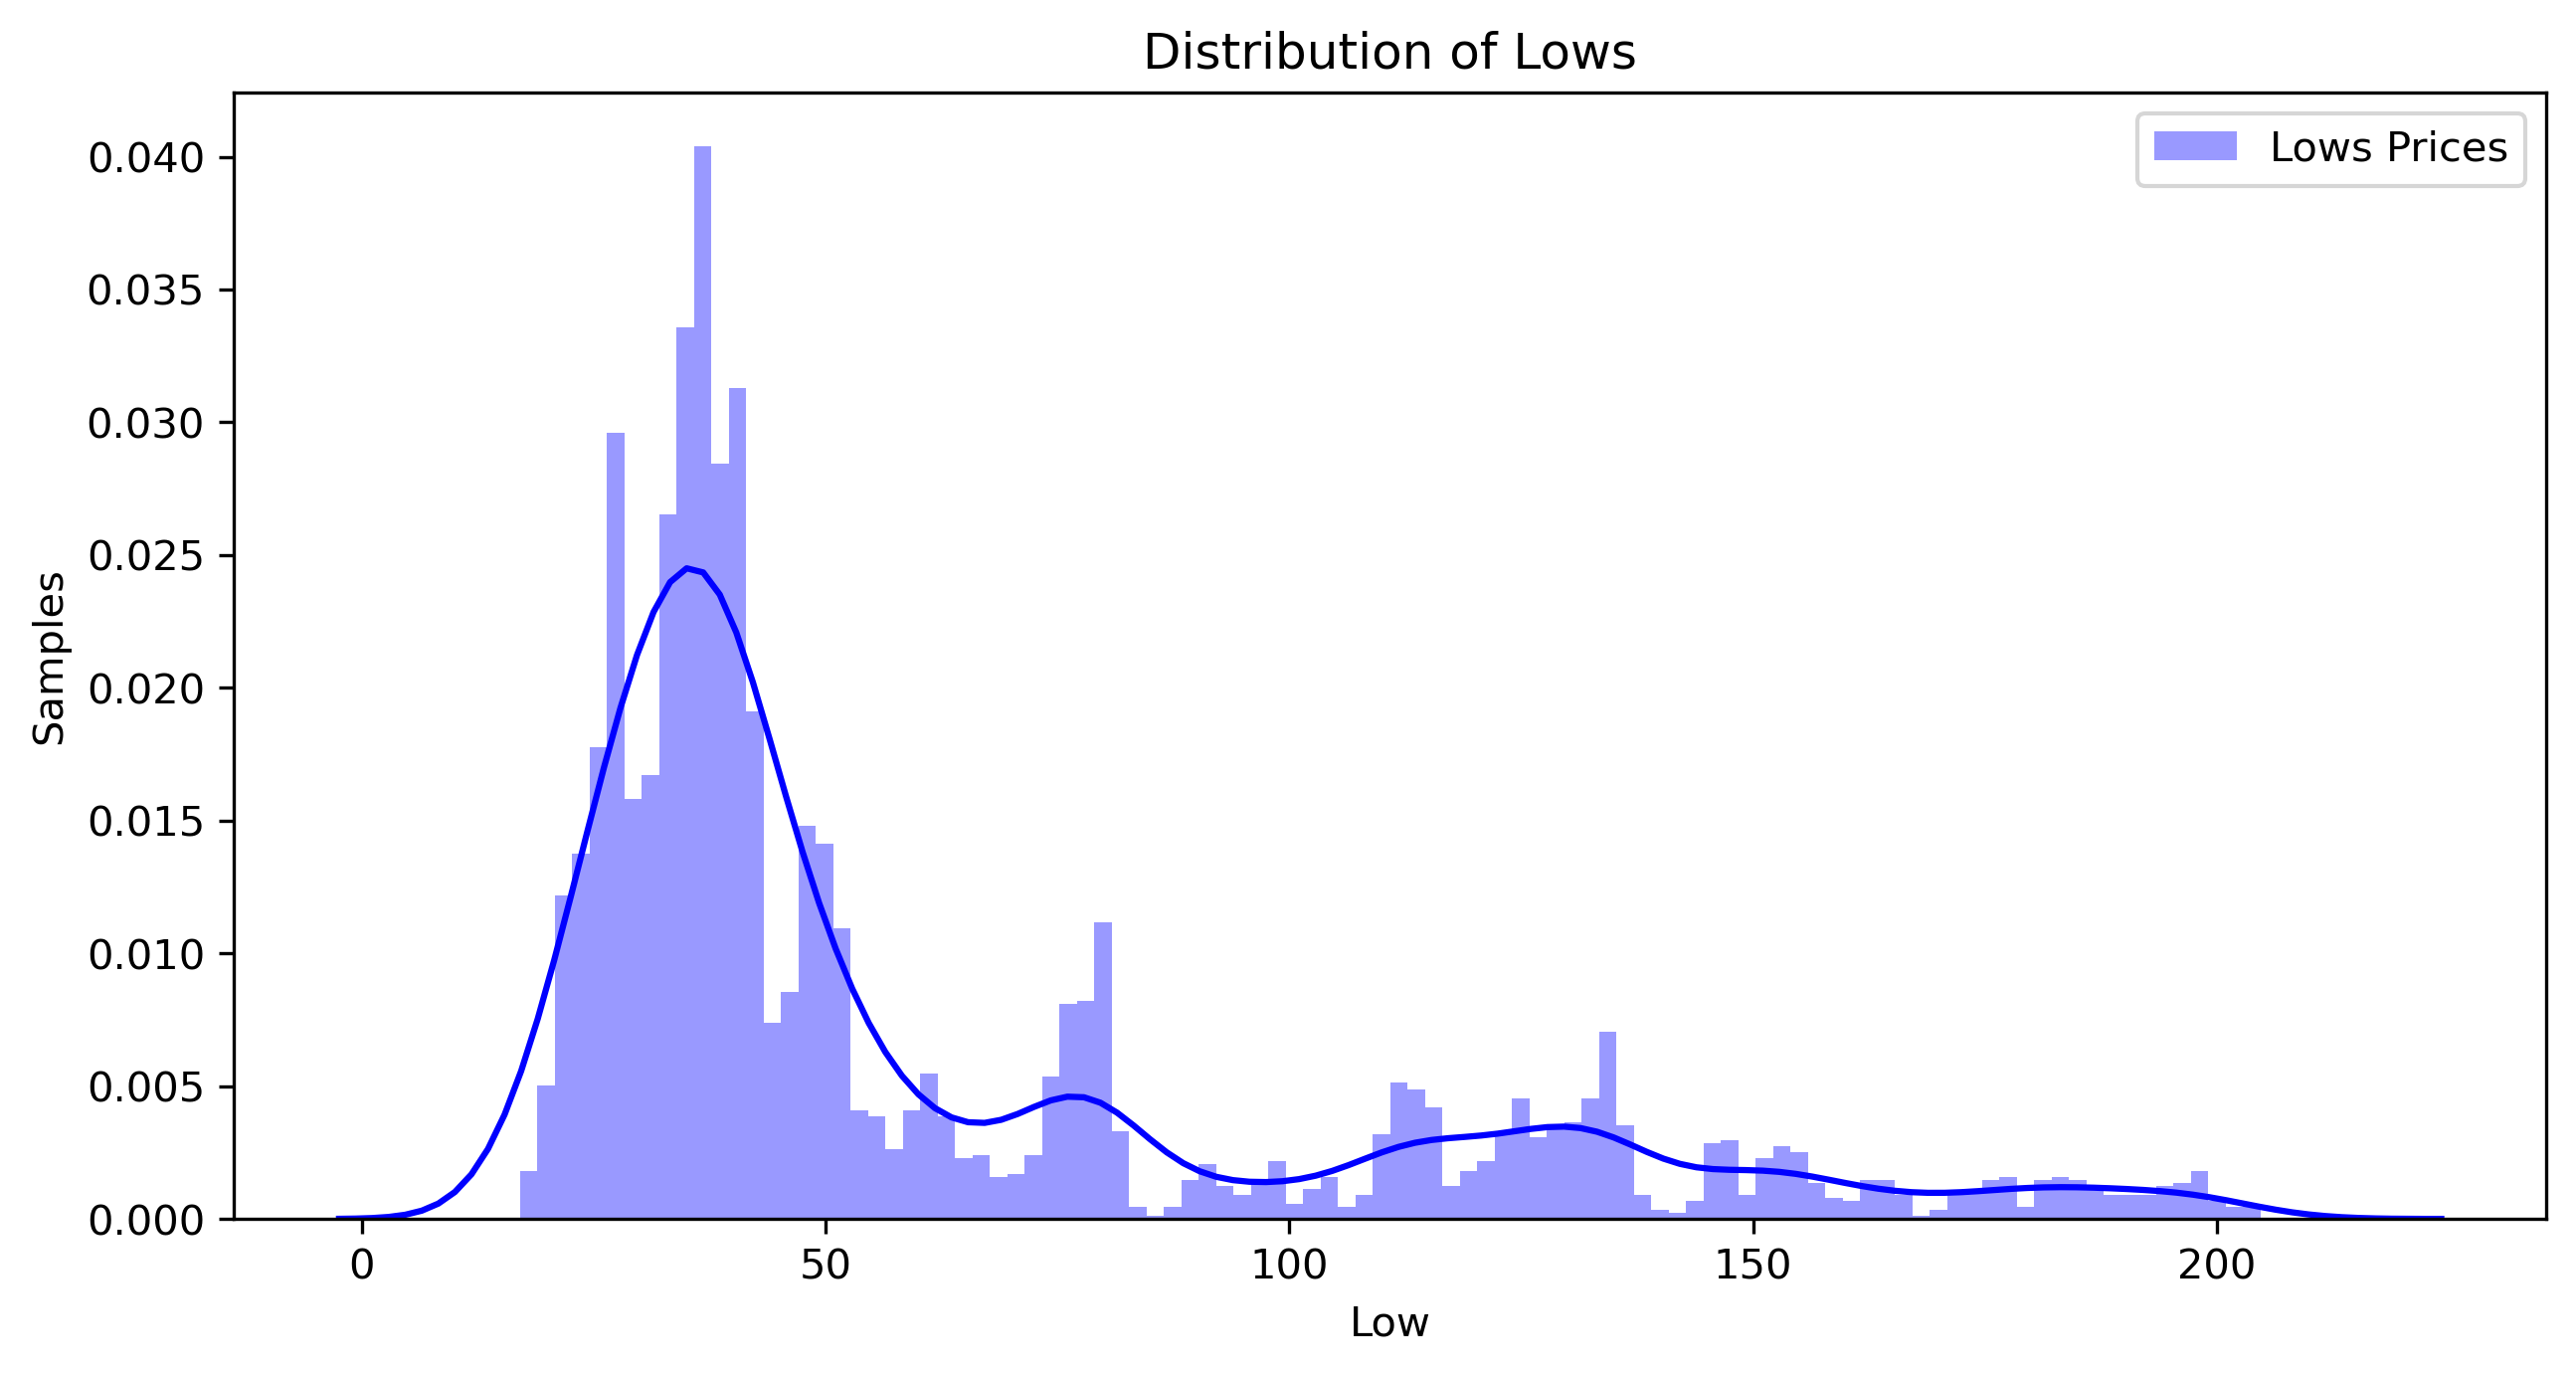

In [7]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['Low'], bins=100, color='b', label='Lows Prices')
plt.title("Distribution of Lows")
plt.xlabel("Low")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione comparata di massimi e minimi:

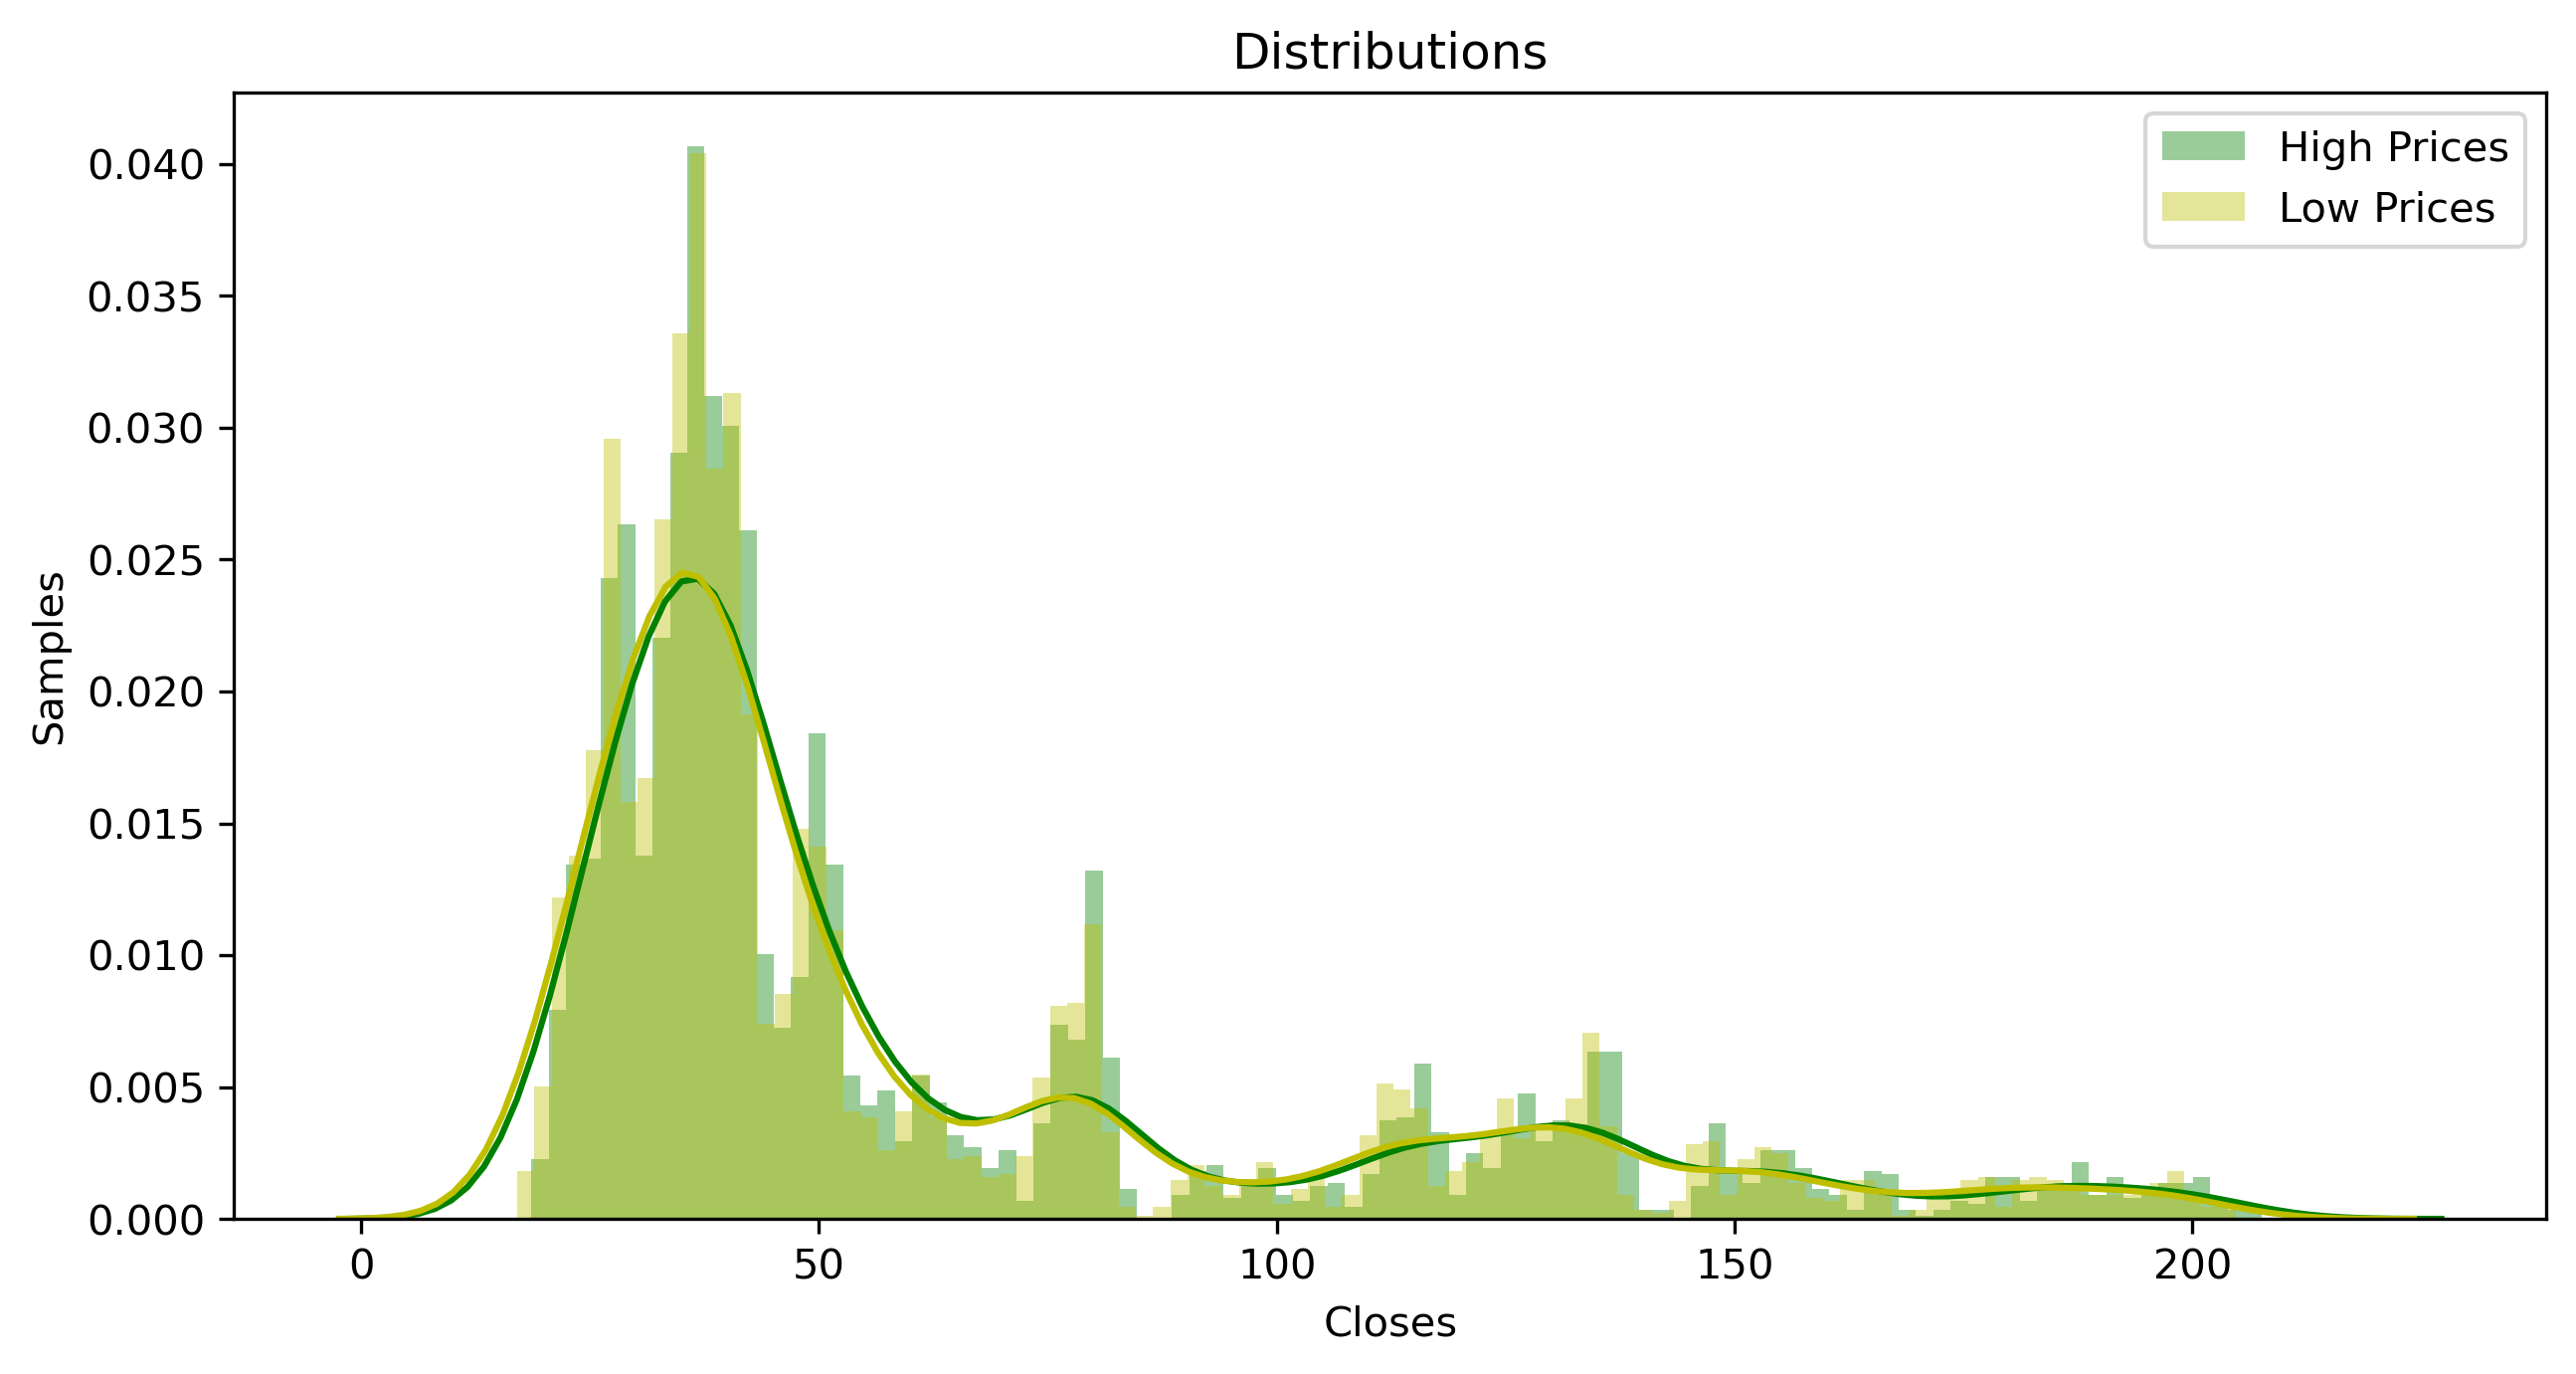

In [8]:
plt.figure(figsize=(10,5),dpi=300)
#sns.distplot(instrument['Open'], bins=100, color='r', label='Open Prices')
sns.distplot(instrument['High'], bins=100, color='g', label='High Prices')
sns.distplot(instrument['Low'], bins=100, color='y', label='Low Prices')
#sns.distplot(instrument['Close'], bins=100, color='b', label='Closes Prices')
plt.title("Distributions")
plt.xlabel("Closes")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione dei range:

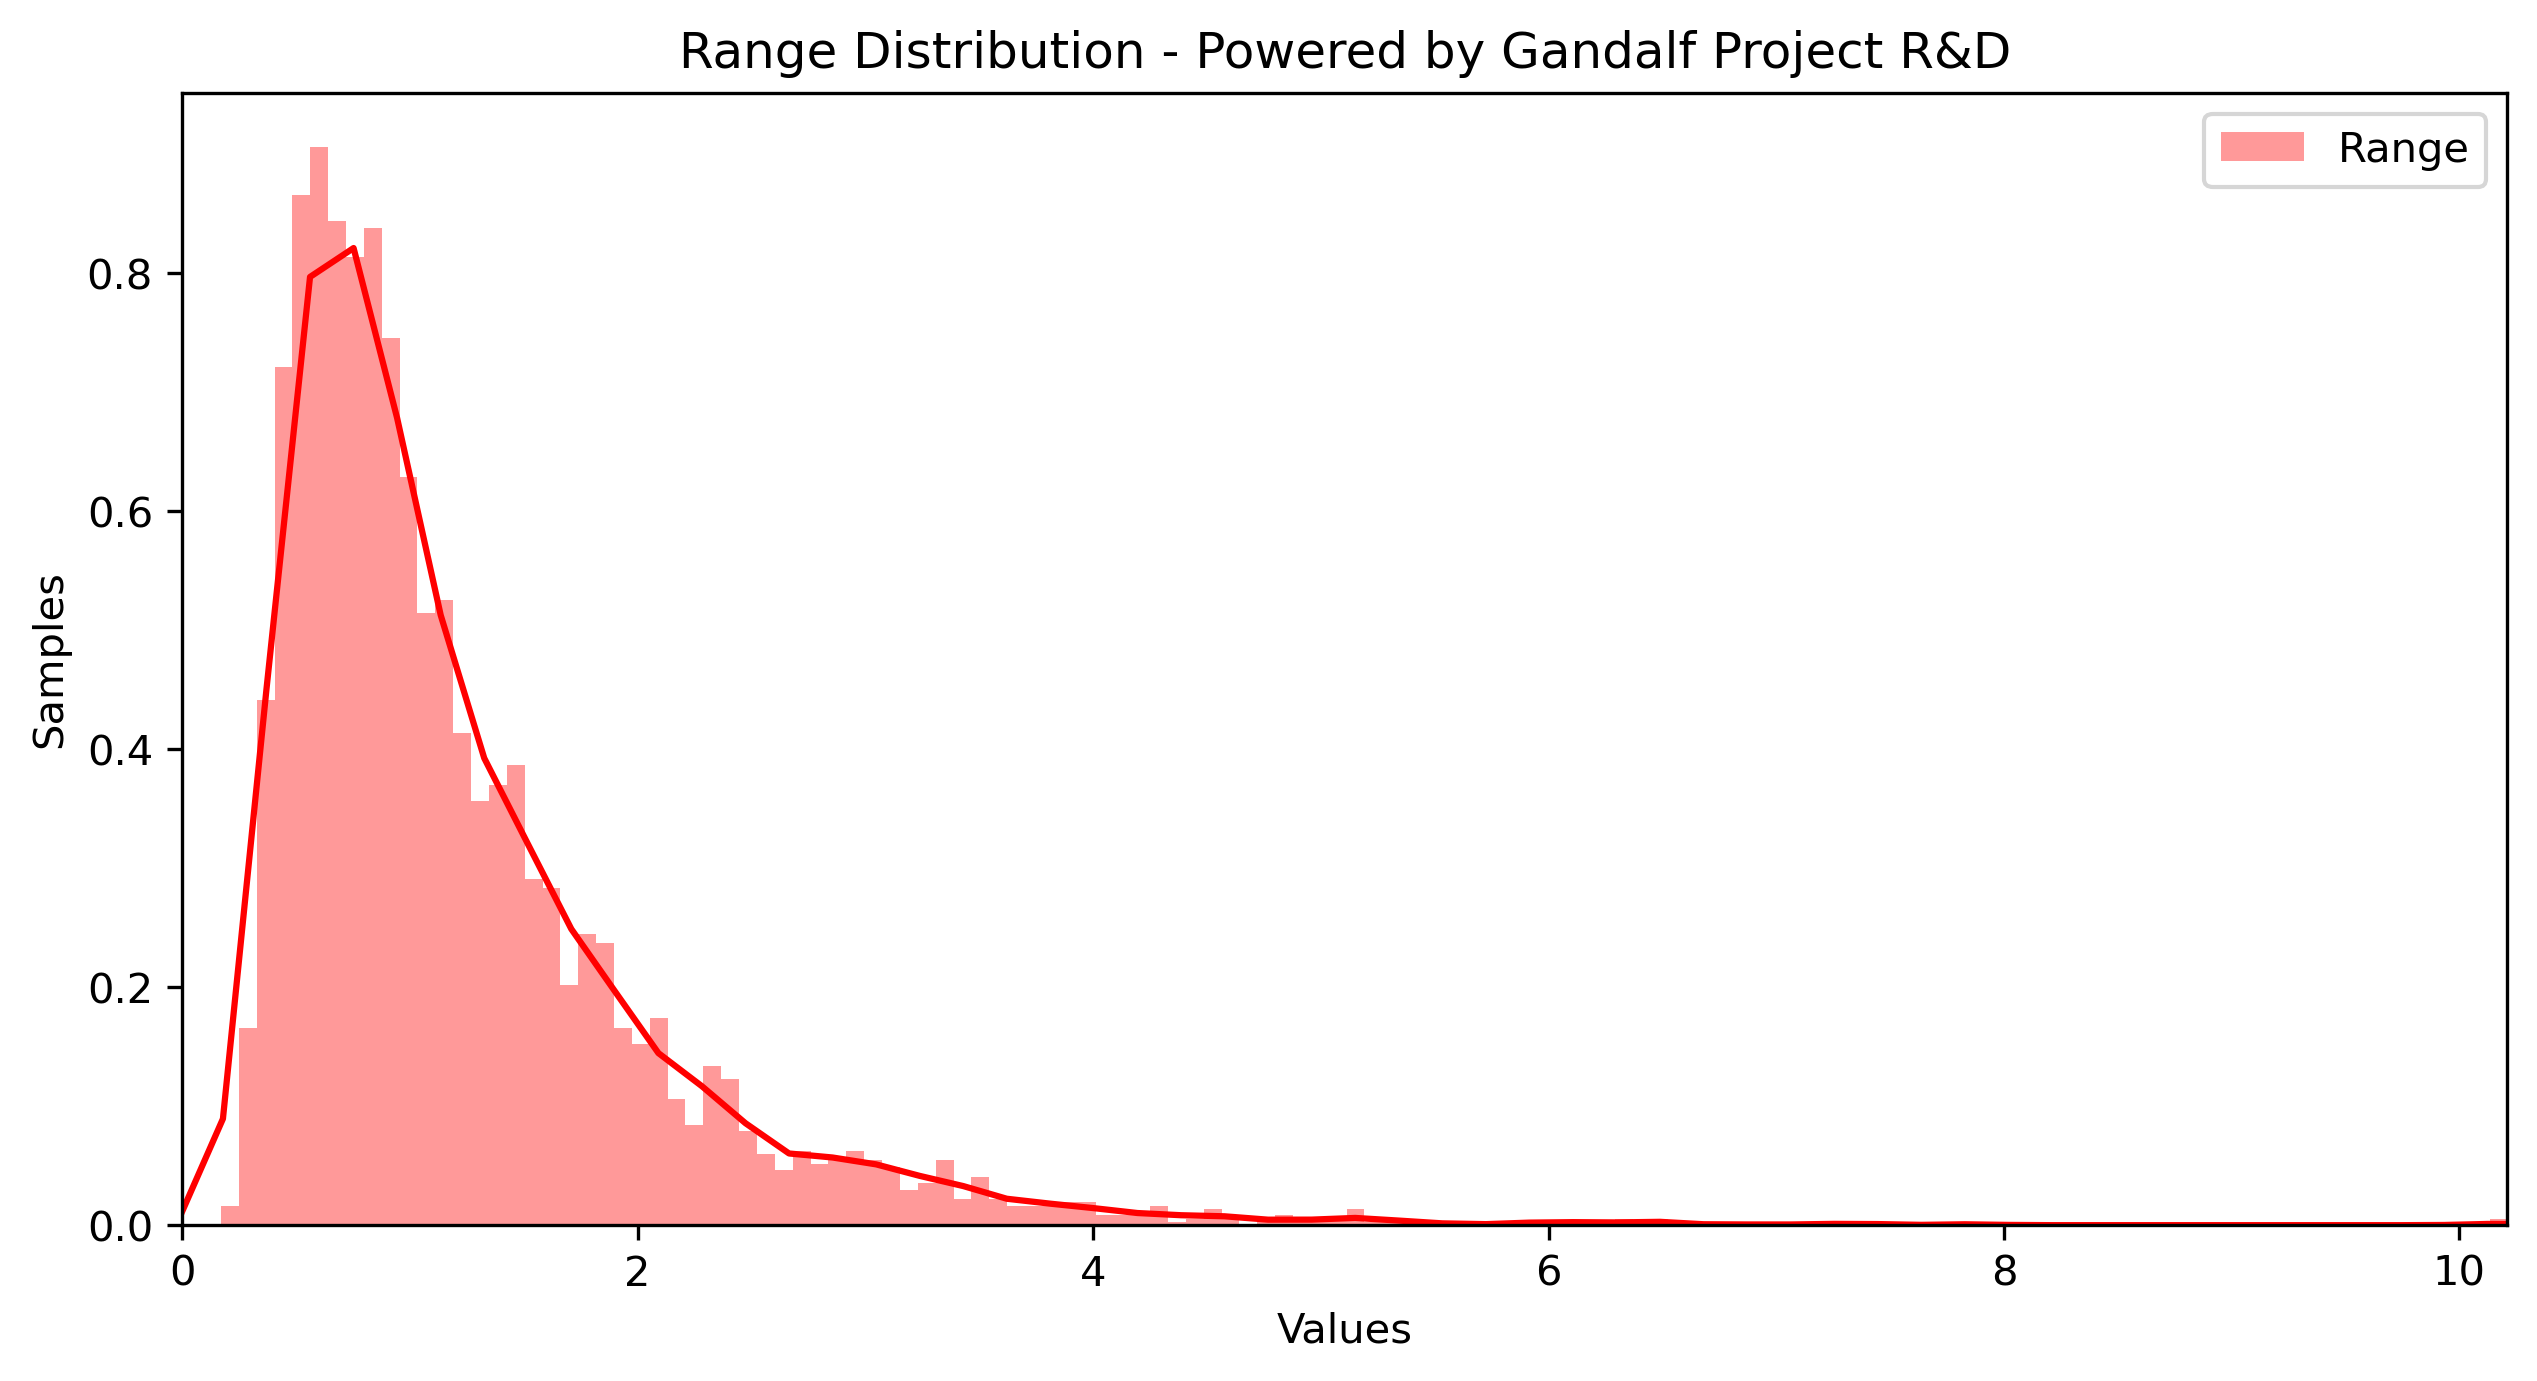

In [9]:
plt.figure(figsize=(10,5), dpi=300)
sns.distplot(instrument['Range'], bins=300, color='r', label='Range')
a = np.array(instrument['Range'].dropna(0))
p1 = np.percentile(a, 99.9)   # tagliamo la visualizzazione degli ultimi outlier
plt.xlim(xmin = 0, xmax = p1)
plt.title("Range Distribution - Powered by Gandalf Project R&D")
plt.xlabel("Values")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione dei body:

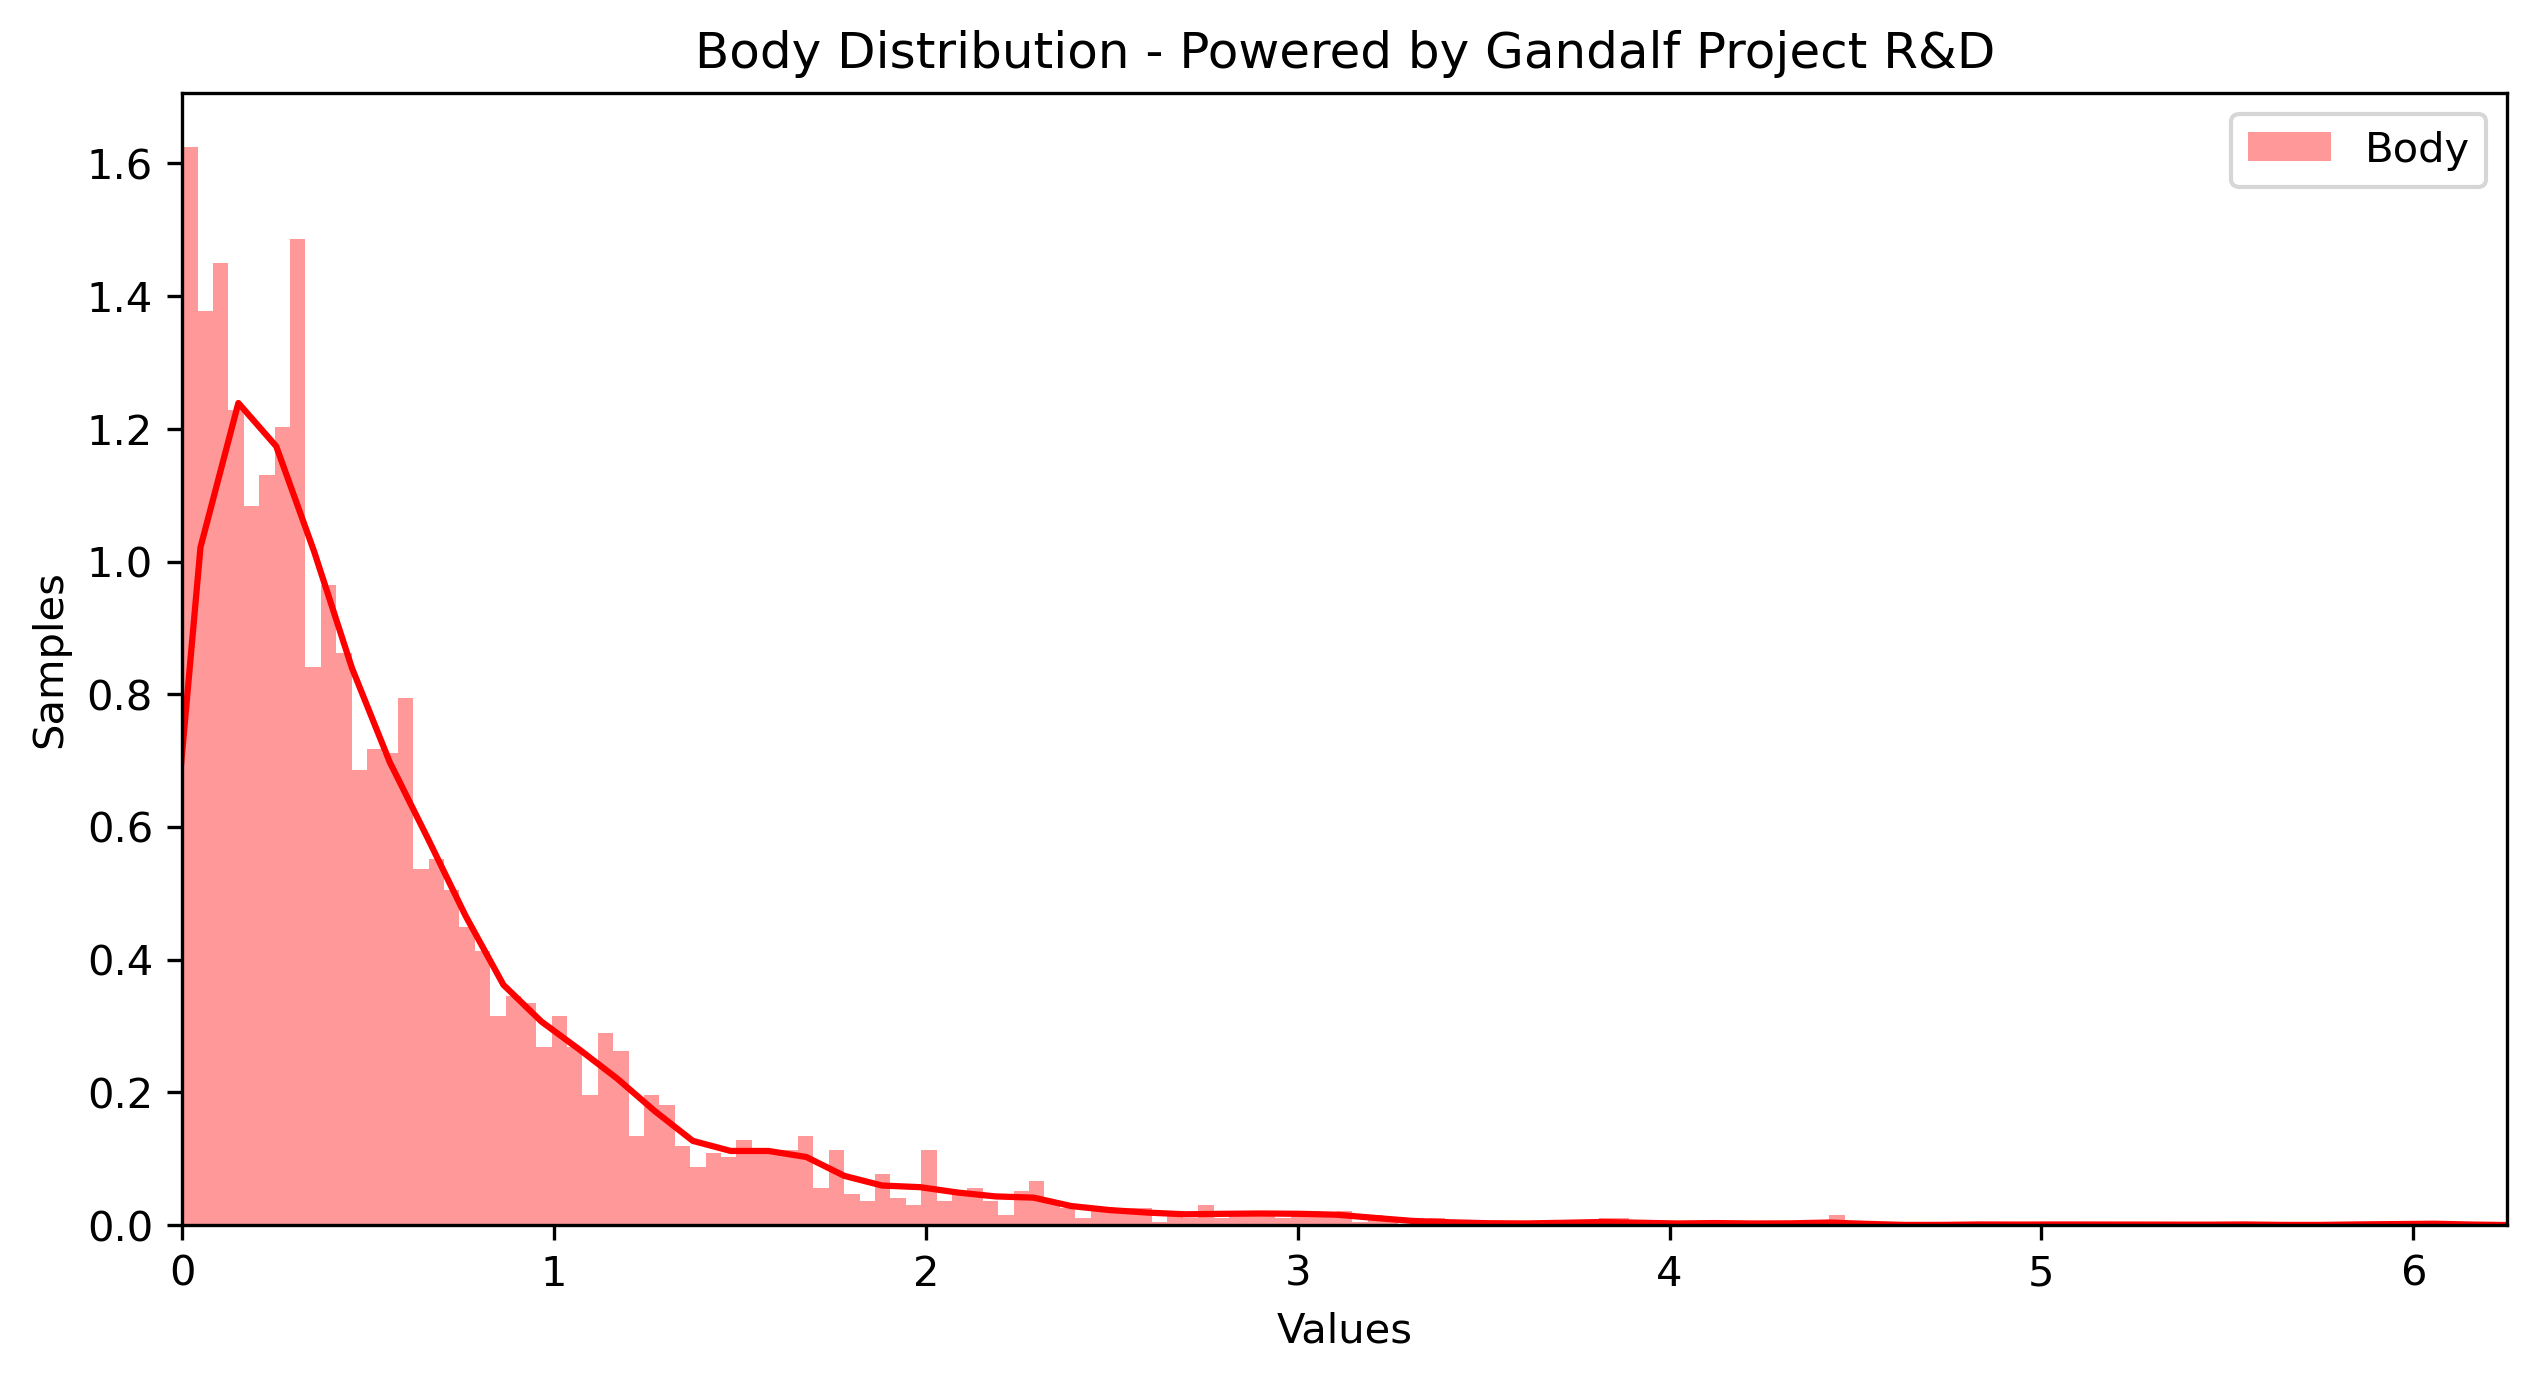

In [10]:
plt.figure(figsize=(10,5), dpi=300)
sns.distplot(instrument['Body'], bins=300, color='r', label='Body')
a = np.array(instrument['Body'].dropna(0))
p1 = np.percentile(a, 99.9)
plt.xlim(xmin = 0, xmax = p1)
plt.title("Body Distribution - Powered by Gandalf Project R&D")
plt.xlabel("Values")
plt.ylabel("Samples")
plt.legend()
plt.show()

Visualizziamo la distribuzione comparata dei body e dei range:

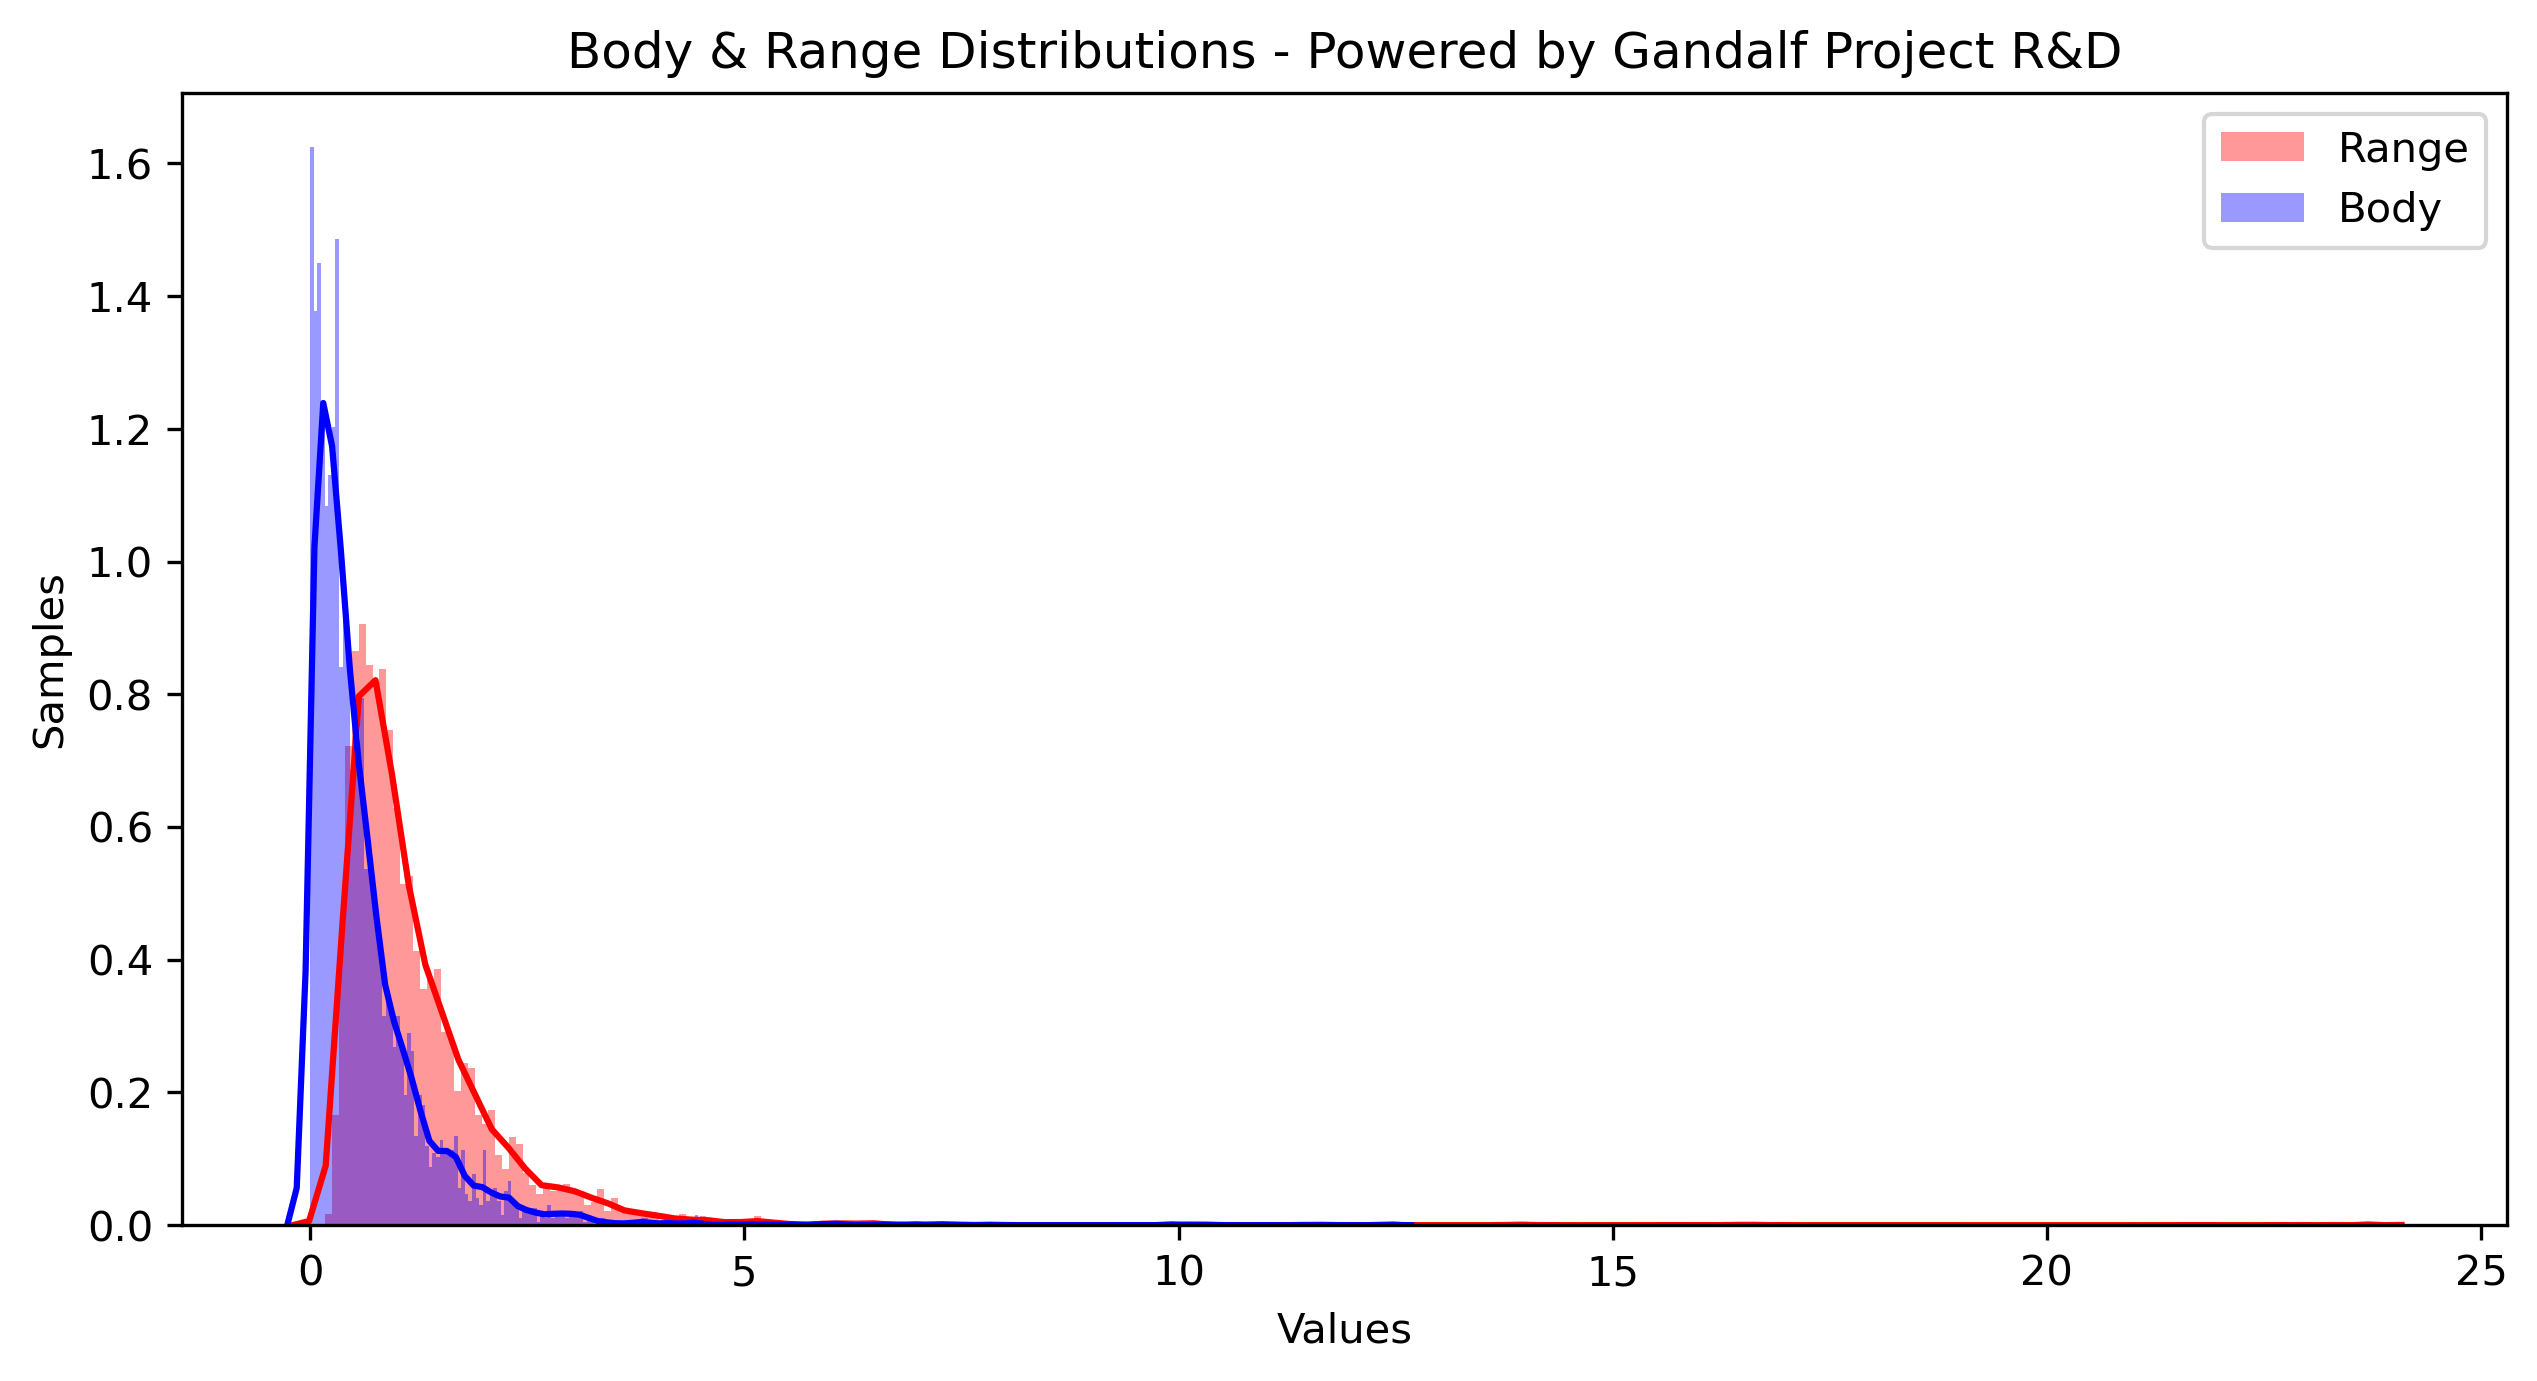

In [11]:
plt.figure(figsize=(10,5), dpi=300)
sns.distplot(instrument['Range'], bins=300, color='r', label='Range')
sns.distplot(instrument['Body'], bins=300, color='b', label='Body')
plt.title("Body & Range Distributions - Powered by Gandalf Project R&D")
plt.xlabel("Values")
plt.ylabel("Samples")
plt.legend()
plt.show()

Cerchiamo una "normalità" sul valore atteso comparato di body e range:

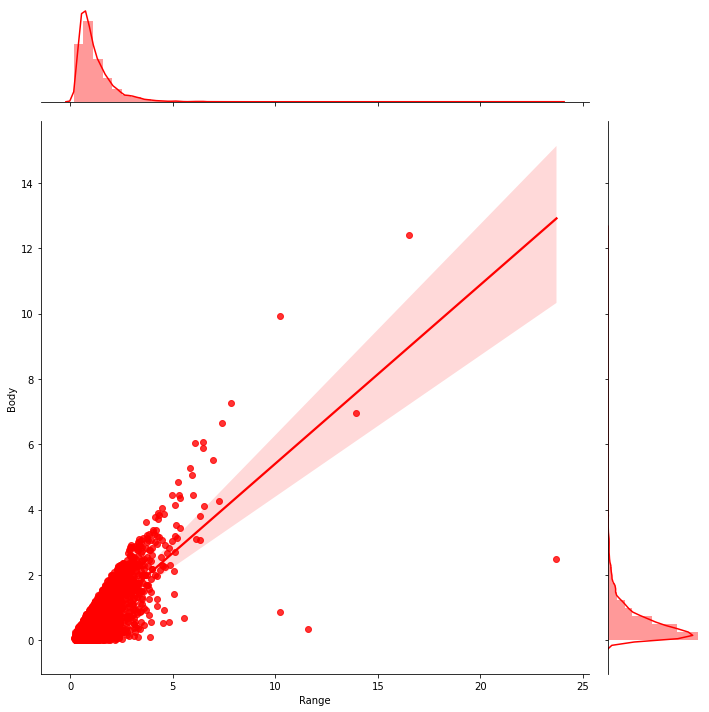

In [14]:
sns.jointplot(x='Range', y='Body', height=10, data=instrument, color='r', kind='reg');

### La scelta dello StopLoss (su osservazione alla Larry Williams "I segreti del trading di breve termine")

L'assunto è che le giornate a grande trend rialzista abbiano un valore piccolo di ritracciamento tra Open e Low, mentre le giornate a grande trend ribassista abbiano un valore piccolo di ritracciamento (positivo) tra Open ed High.

Prendiamo la distribuzione dei Body Intraday (Close-Open) in rapporto alla distanza tra Open e Low (per operazioni Long):

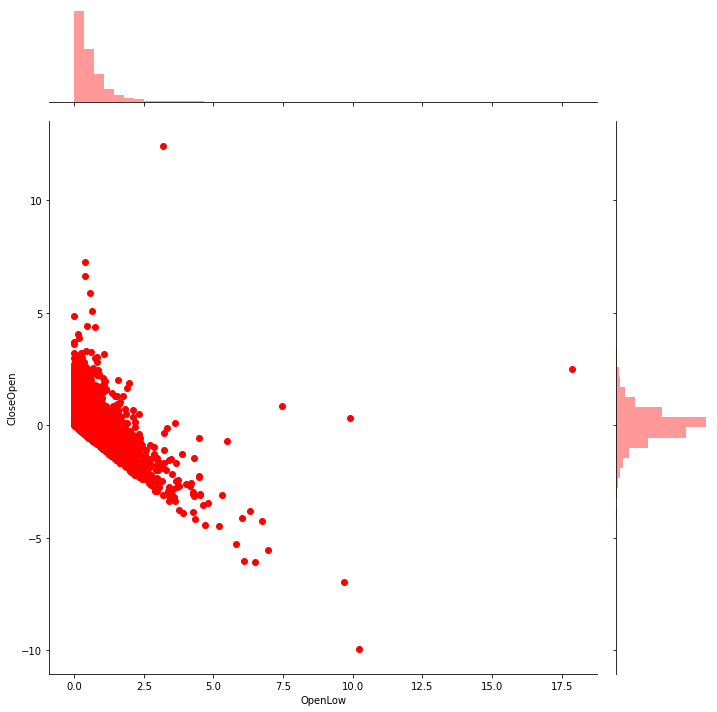

In [15]:
sns.jointplot(x='OpenLow', y='CloseOpen', height=10, data=instrument, kind='scatter', color='r');

Si nota come effettivamente le operazioni vincenti ([Close - Open]>0) siano più probabili per OpenLow (Open-Low) ridotti!

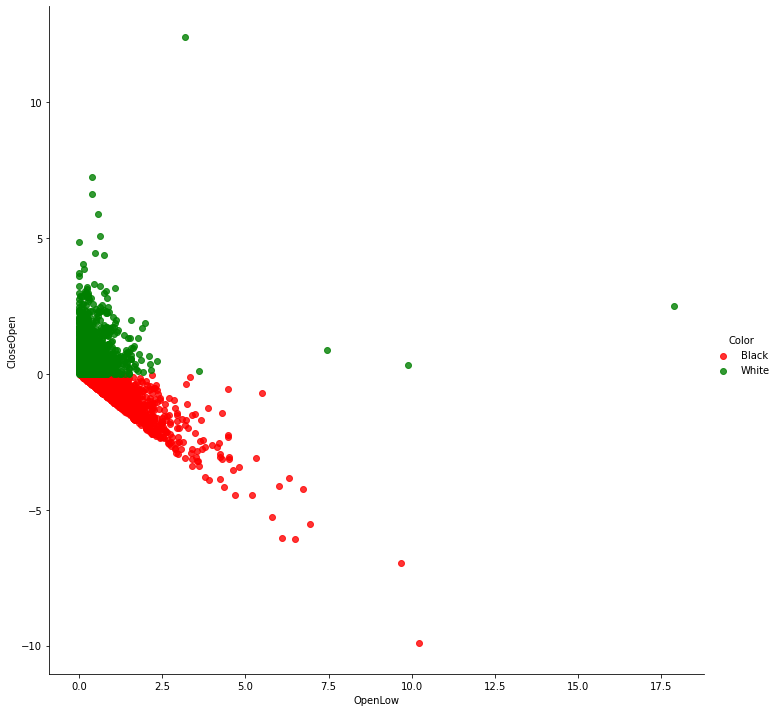

In [18]:
sns.lmplot(x='OpenLow', 
           y='CloseOpen', 
           height=10, 
           hue='Color', 
           data=instrument, 
           fit_reg=False, 
           palette=dict(White="g", Black="r"));

## Facciamo la stessa analisi per le operazioni Short:

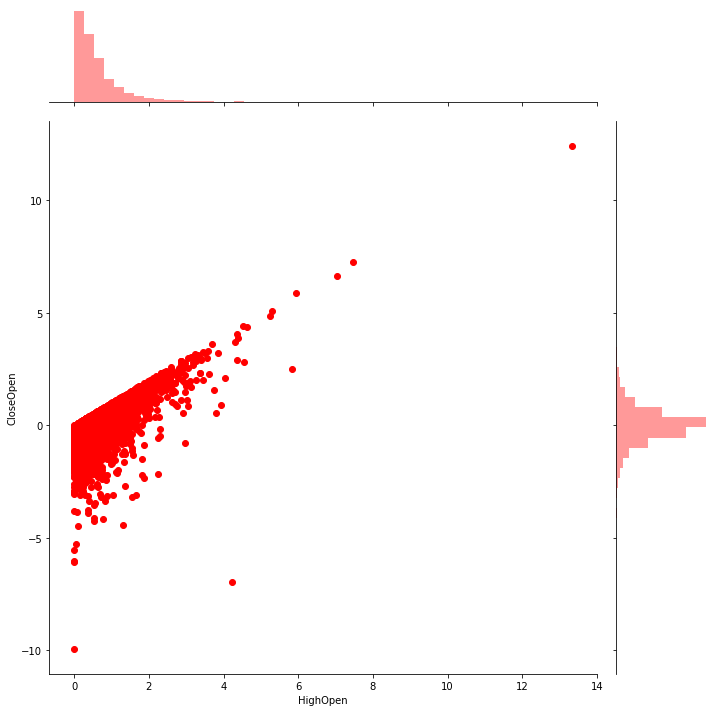

In [19]:
sns.jointplot(x='HighOpen', y='CloseOpen', height=10, data=instrument, kind='scatter', color='r');

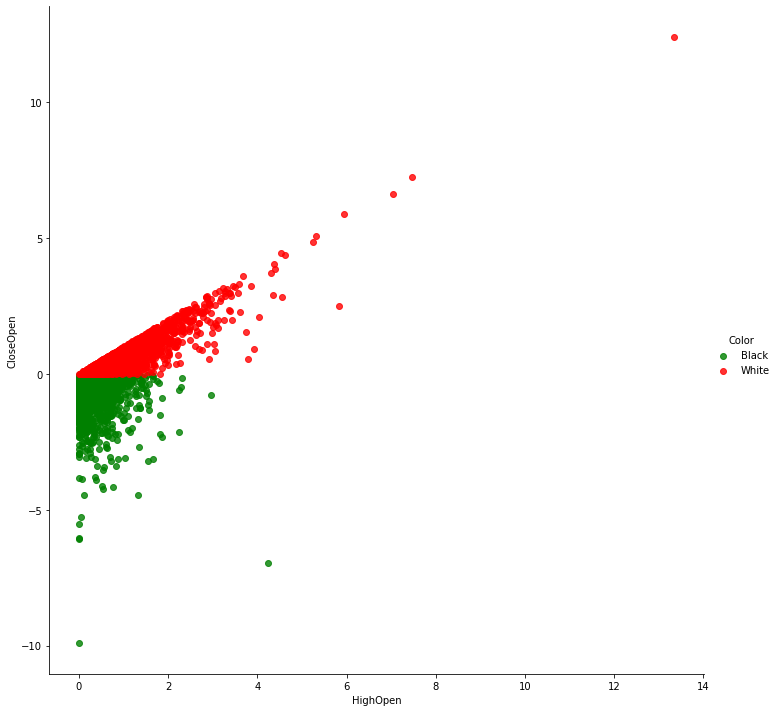

In [20]:
sns.lmplot(x='HighOpen', 
           y='CloseOpen', 
           height=10, 
           hue='Color', 
           data=instrument, 
           fit_reg=False, 
           palette=dict(White="r", Black="g"));

Decidiamo dunque di utilizzare uno stoploss, per operazioni LONG, proporzionale al 95esimo quantile della distribuzione di OpenLow per CloseOpen positivi e, per operazioni SHORT, proporzionale al 95esimo quantile della distribuzione di HighOpen per CloseOpen negativi:

In [21]:
"""
print("Serie OpenLow:")
print("Media:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].mean())
print("Minimo:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].min())
print("Massimo:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].max())
print("50esimo quantile:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.5))
print("60esimo quantile:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.6))
print("70esimo quantile:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.7))
print("80esimo quantile:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.8))
print("90esimo quantile:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.9))
print("99esimo quantile:", instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.99))
"""

print("Positive:",instrument[instrument['CloseOpen'] > 0]['OpenLow'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("Negative:",instrument[instrument['CloseOpen'] < 0]['HighOpen'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())

print("")
print("StopLoss Long tarato sul 95esimo quantile della distribuzione:",
      -instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.95))
print("StopLoss Short tarato sul 95esimo quantile della distribuzione:",
      -instrument[instrument['CloseOpen'] < 0]['HighOpen'].quantile(.95))

Positive: count    2333.000000
mean        0.309396
std         0.546887
min         0.000000
25%         0.080000
50%         0.200000
75%         0.380000
80%         0.450000
90%         0.690000
95%         0.940000
99%         1.560000
max        17.880000
Name: OpenLow, dtype: float64

Negative: count    2308.00000
mean        0.30136
std         0.32067
min         0.00000
25%         0.09000
50%         0.21000
75%         0.41250
80%         0.48000
90%         0.68300
95%         0.88000
99%         1.50000
max         4.23000
Name: HighOpen, dtype: float64

StopLoss Long tarato sul 95esimo quantile della distribuzione: -0.94
StopLoss Short tarato sul 95esimo quantile della distribuzione: -0.8799999999999999


# Mettiamo insieme i blocchi: CODICE #1

Il file contiene 4682 record

                 count          mean           std     min         10%  \
Open            4681.0  6.262071e+01  4.408440e+01   17.74       27.05   
High            4681.0  6.322779e+01  4.432258e+01   18.60       27.50   
Low             4681.0  6.200205e+01  4.383873e+01   17.05       26.65   
Close           4681.0  6.262888e+01  4.409429e+01   18.00       27.09   
Vol             4681.0  1.010005e+07  6.988861e+06  100.00  4060994.00   
AvgPrice        4681.0  6.261978e+01  4.408262e+01   18.10       27.07   
Range           4681.0  1.225736e+00  9.742639e-01    0.17        0.48   
Body            4681.0  5.993890e-01  6.826895e-01    0.00        0.07   
CloseOpen       4681.0  8.169195e-03  9.084835e-01   -9.92       -0.89   
CloseOpenPerc   4681.0  2.555437e-02  1.653605e+00   -6.98       -1.76   
OpenLow         4681.0  6.186627e-01  7.651185e-01    0.00        0.06   
HighOpen        4681.0  6.070733e-01  6.653508e-01    0.00        0.06   
CloseLow

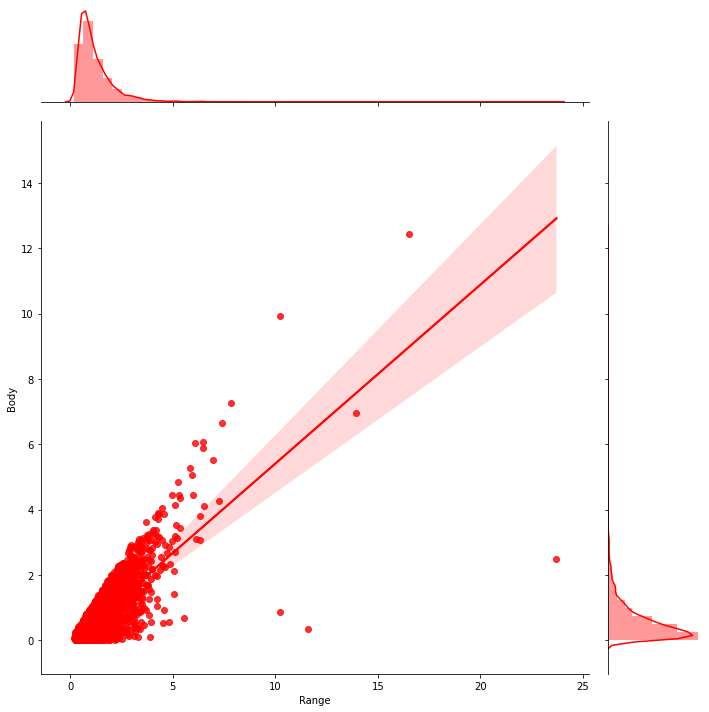

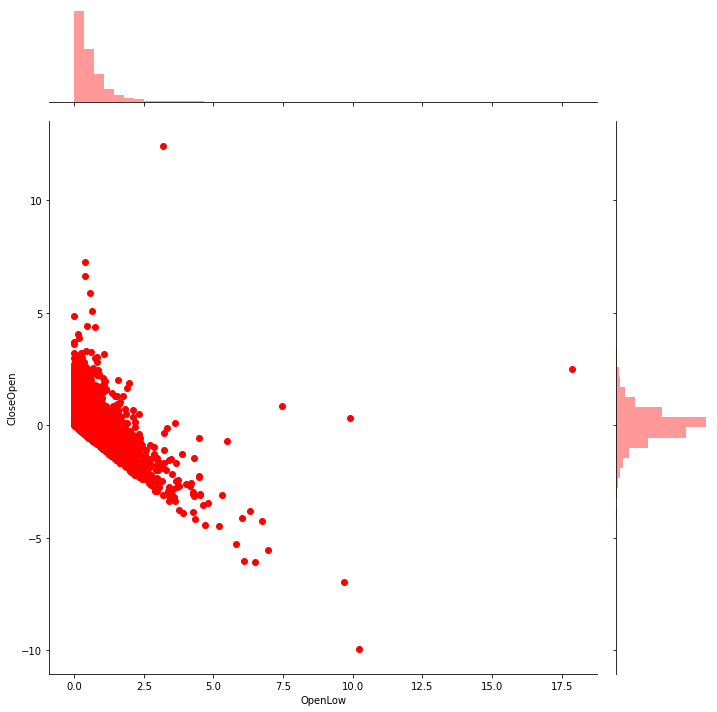

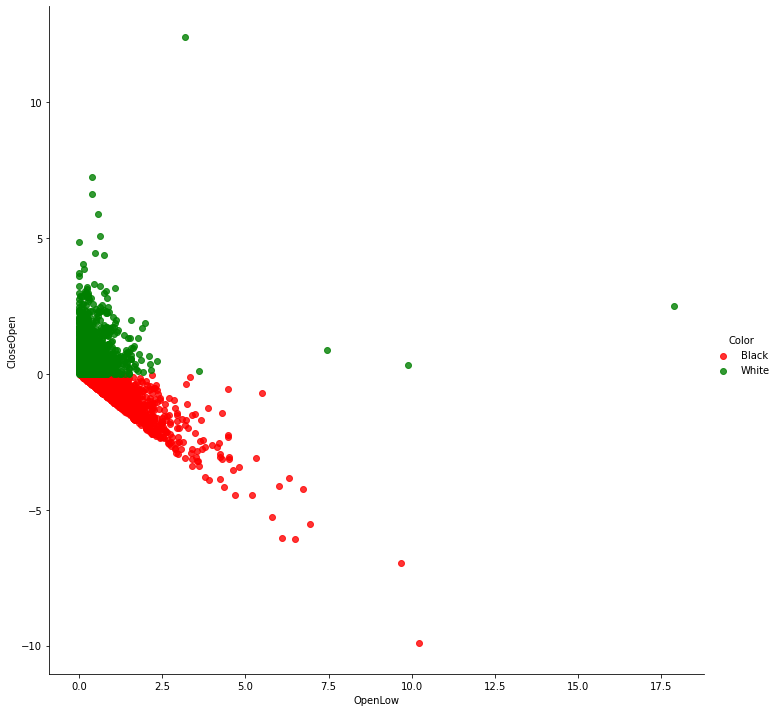

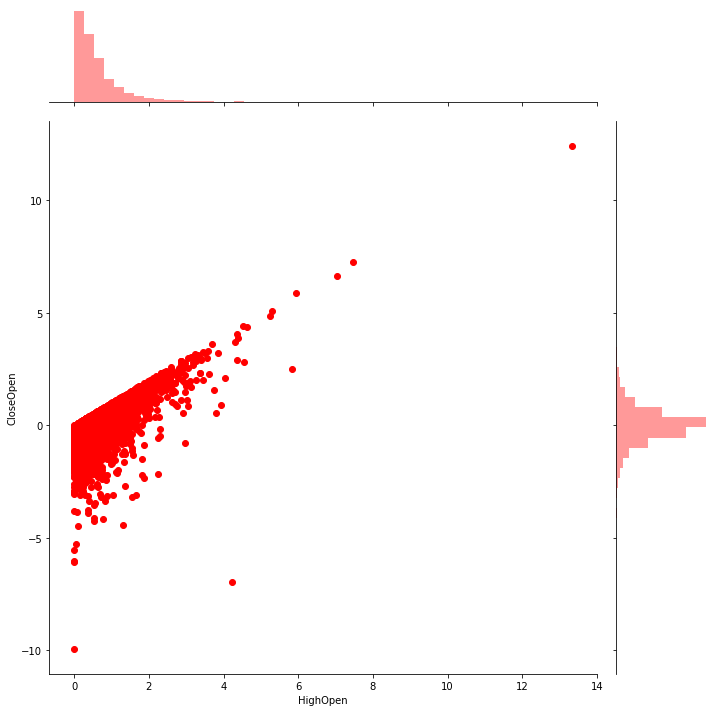

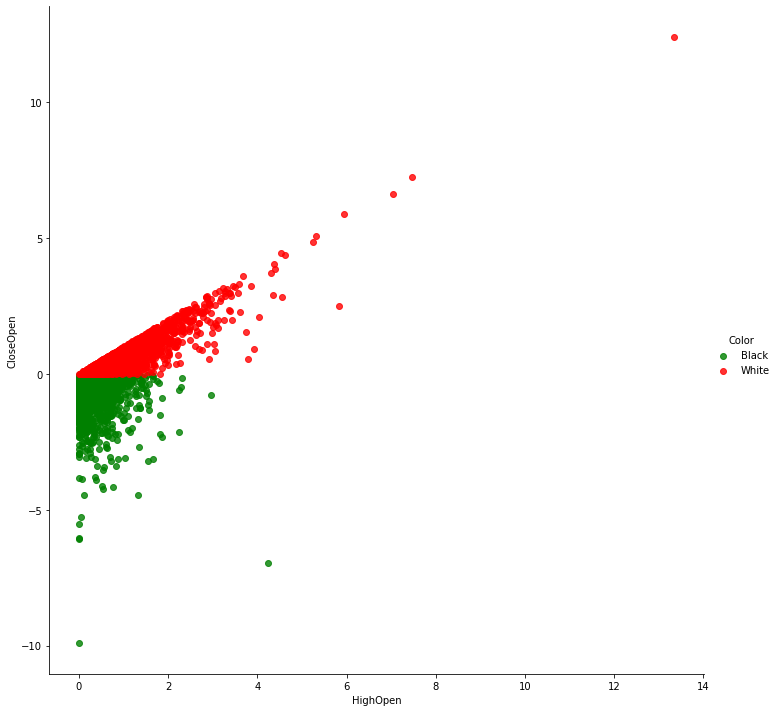

In [23]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "HD_Daily.txt"

startDate = "20000101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Vol'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['CloseOpen'] = round((instrument['Close'] - instrument['Open']),2)
instrument['CloseOpenPerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Color'] = list(map(lambda x: "Black" if x<0 else "White", instrument['CloseOpen']))
instrument['OpenLow'] = round((instrument['Open'] - instrument['Low']),2)
instrument['HighOpen'] = round((instrument['High'] - instrument['Open']),2)
instrument['CloseLow'] = round((instrument['Close'] - instrument['Low']),2)
instrument['HighClose'] = round((instrument['High'] - instrument['Close']),2)
instrument['BodyRangePerc'] = round(instrument['Body']/instrument['Range'] * 100,2)
# Percentuale della barra (all'interno del range) dove si attesta il close
instrument['CloseBarPerc'] = round((instrument['Close'] - instrument['Low']) * 100 / instrument['Range'],2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
#print(instrument.head(10))

print("")
print(instrument.describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]).transpose())

sns.jointplot(x='Range', y='Body', height=10, data=instrument, color='r', kind='reg')

sns.jointplot(x='OpenLow', y='CloseOpen', height=10, data=instrument, kind='scatter', color='r')

sns.lmplot(x='OpenLow', 
           y='CloseOpen', 
           height=10, 
           hue='Color', 
           data=instrument, 
           fit_reg=False, 
           palette=dict(White="g", Black="r"))

sns.jointplot(x='HighOpen', y='CloseOpen', height=10, data=instrument, kind='scatter', color='r')

sns.lmplot(x='HighOpen', 
           y='CloseOpen', 
           height=10, 
           hue='Color', 
           data=instrument, 
           fit_reg=False, 
           palette=dict(White="r", Black="g"))

print("")
print("Positive:",instrument[instrument['CloseOpen'] > 0]['OpenLow'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("Negative:",instrument[instrument['CloseOpen'] < 0]['HighOpen'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())

print("")
print("StopLoss Long tarato sul 95esimo quantile della distribuzione:",
      -instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.95))
print("StopLoss Short tarato sul 95esimo quantile della distribuzione:",
      -instrument[instrument['CloseOpen'] < 0]['HighOpen'].quantile(.95))

# Caso Intraday: CODICE #2

Il file contiene 68540 record

                  count         mean          std     min     10%      20%  \
Open            68523.0  1303.418687   260.604971  788.70  950.30  1061.90   
High            68523.0  1305.239058   260.898275  791.30  952.12  1063.60   
Low             68523.0  1301.547774   260.267808  786.70  948.10  1060.30   
Close           68523.0  1303.419163   260.596124  788.50  950.22  1061.90   
Volume          68523.0  6006.083767  7707.708325    1.00  612.00  1101.00   
AvgPrice        68523.0  1303.406171   260.587221  789.88  950.26  1061.85   
Range           68523.0     3.691285     3.224726    0.00    1.20     1.60   
Body            68523.0     1.728412     2.225648    0.00    0.20     0.40   
CloseOpen       68523.0     0.000476     2.817971  -47.60   -2.50    -1.40   
CloseOpenPerc   68523.0     0.000408     0.218117   -4.70   -0.20    -0.11   
OpenLow         68523.0     1.870913     2.480515    0.00    0.20     0.40   
HighOpen        68523.0     1.820

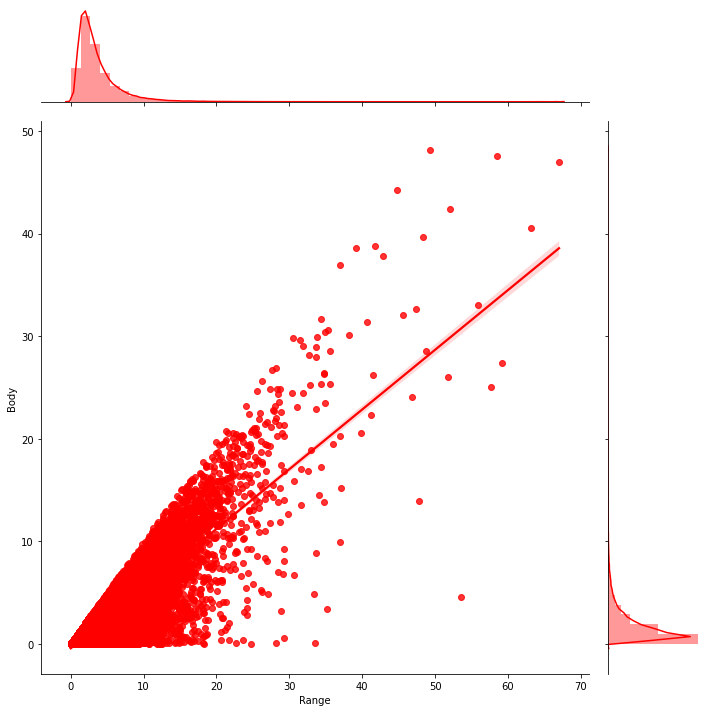

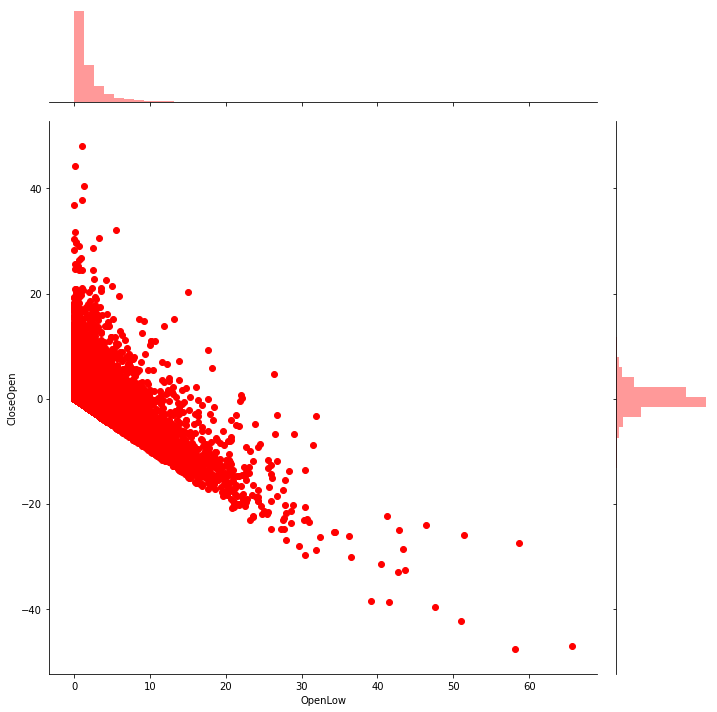

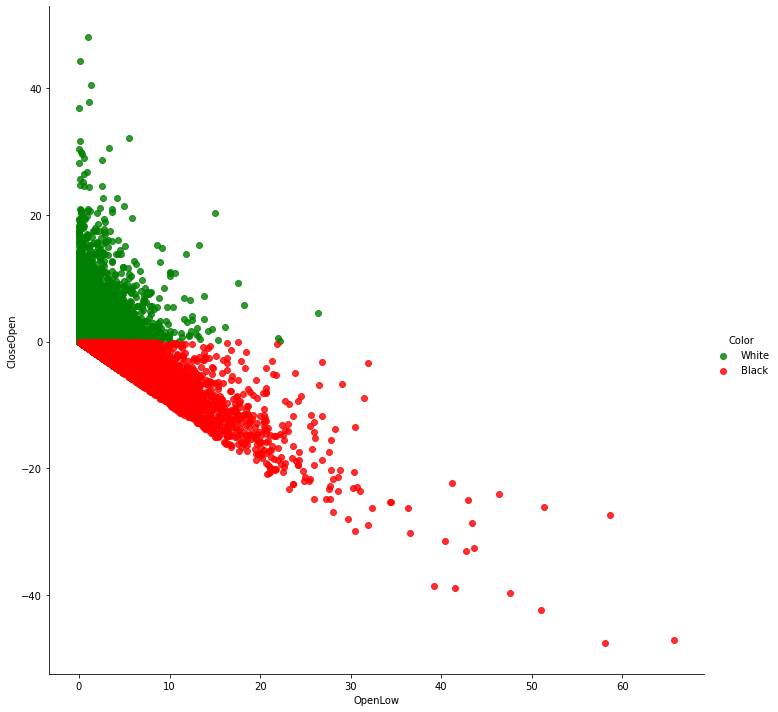

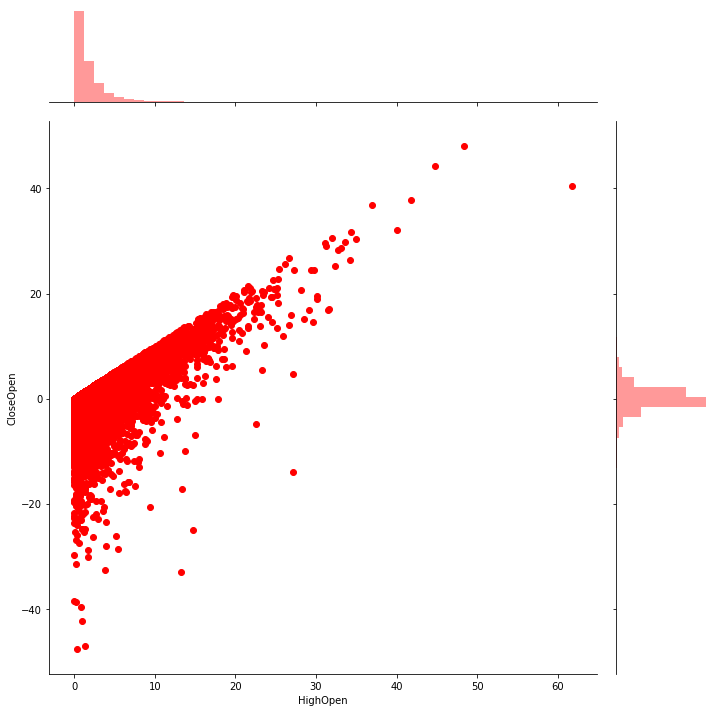

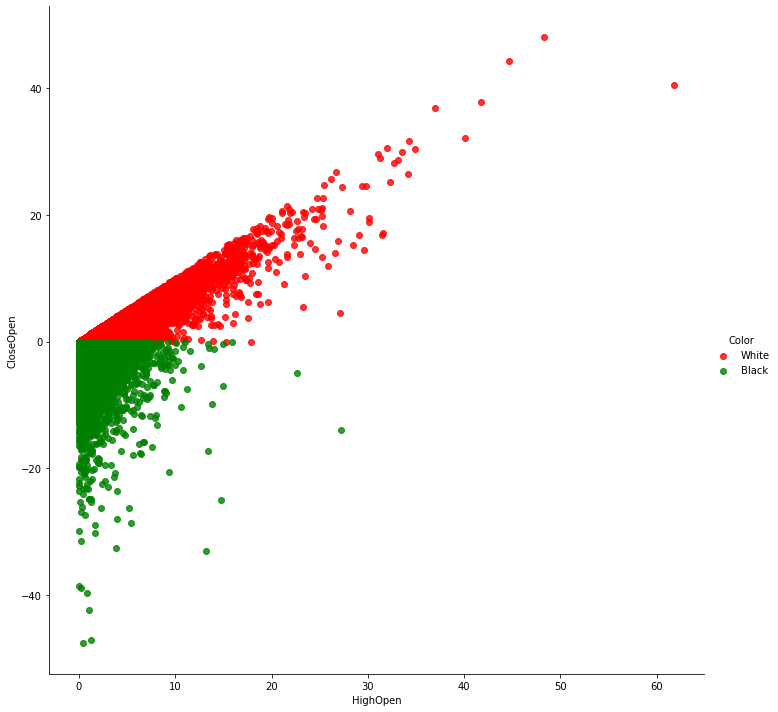

In [24]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "@GC_60min.txt"

startDate = "20070101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument['Volume'] = abs(instrument['Up'] + instrument['Down'])
instrument.drop('Date_Time',axis=1,inplace=True)
instrument.drop('Up',axis=1,inplace=True)
instrument.drop('Down',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['CloseOpen'] = round((instrument['Close'] - instrument['Open']),2)
instrument['CloseOpenPerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Color'] = list(map(lambda x: "Black" if x<0 else "White", instrument['CloseOpen']))
instrument['OpenLow'] = round((instrument['Open'] - instrument['Low']),2)
instrument['HighOpen'] = round((instrument['High'] - instrument['Open']),2)
instrument['CloseLow'] = round((instrument['Close'] - instrument['Low']),2)
instrument['HighClose'] = round((instrument['High'] - instrument['Close']),2)
instrument['BodyRangePerc'] = round(instrument['Body']/instrument['Range'] * 100,2)
# Percentuale della barra (all'interno del range) dove si attesta il close
instrument['CloseBarPerc'] = round((instrument['Close'] - instrument['Low']) * 100 / instrument['Range'],2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
#print(instrument.head(10))

print("")
print(instrument.describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]).transpose())

sns.jointplot(x='Range', y='Body', height=10, data=instrument, color='r', kind='reg')

sns.jointplot(x='OpenLow', y='CloseOpen', height=10, data=instrument, kind='scatter', color='r')

sns.lmplot(x='OpenLow', 
           y='CloseOpen', 
           height=10, 
           hue='Color', 
           data=instrument, 
           fit_reg=False, 
           palette=dict(White="g", Black="r"))

sns.jointplot(x='HighOpen', y='CloseOpen', height=10, data=instrument, kind='scatter', color='r')

sns.lmplot(x='HighOpen', 
           y='CloseOpen', 
           height=10, 
           hue='Color', 
           data=instrument, 
           fit_reg=False, 
           palette=dict(White="r", Black="g"))

print("")
print("Positive:",instrument[instrument['CloseOpen'] > 0]['OpenLow'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("Negative:",instrument[instrument['CloseOpen'] < 0]['HighOpen'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())

print("")
print("StopLoss Long tarato sul 95esimo quantile della distribuzione:",
      -instrument[instrument['CloseOpen'] > 0]['OpenLow'].quantile(.95))
print("StopLoss Short tarato sul 95esimo quantile della distribuzione:",
      -instrument[instrument['CloseOpen'] < 0]['HighOpen'].quantile(.95))